# STARS CLASSIFICATION

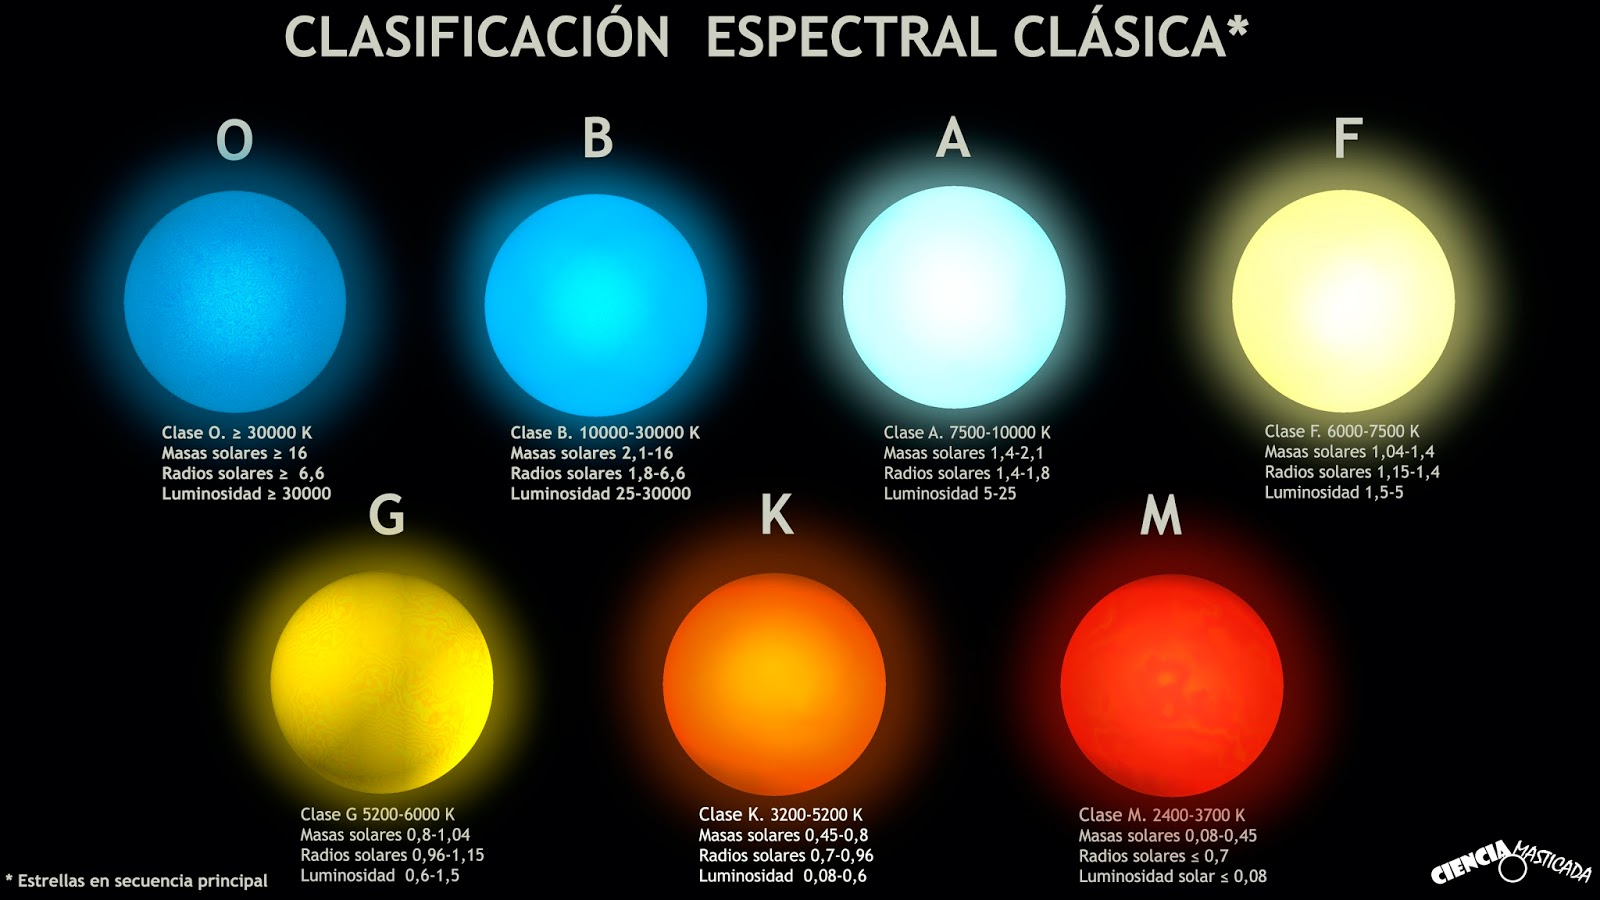


## NAMES 📋
* Mercedes La Fuente 
* Juan Luis Canedo Villarroel

# ABOUT THE PRACTICE
You are a Data Scientist working for NASA. Scientists hypothesize that the different types of stars that exist: the
types of stars that exist:
- Red Dwarf
- Brown Dwarf
- White Dwarf
- Main Sequence
- Super Giants
- Hyper Giants
depend on their temperature, relative luminosity, relative radius, absolute magnitude, color and spectrum class.
Your task is that given a data set, train an artificial neural network to predict the type of star based on its characteristics by following all the steps of the data set.
the type of star based on its characteristics following all the necessary steps to put such a model into production. in production.

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from keras import models
from keras.models import Sequential,model_from_json
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from keras import optimizers
from tensorflow.keras import optimizers
from numpy.random import seed
from numpy import array
from numpy import argmax
from keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# READ DATA SET

In [3]:
seed(10)
# read dataset
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0)
df[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.0773,17.08,Red,M,0
1,12098,689.000000,7.0100,0.02,Blue White,A,3
2,2731,0.000437,0.0856,18.09,Red,M,0
3,37800,202900.000000,6.8600,-4.56,Blue,O,3
4,8570,0.000810,0.0097,14.20,Blue White,A,2
5,3605,126000.000000,1124.0000,-10.81,Red,M,5
6,8052,8.700000,1.8000,2.42,Whitish,A,3
7,3574,200000.000000,89.0000,-5.24,Red,M,4
8,8829,537493.000000,1423.0000,-10.73,White,A,5
9,3625,74000.000000,876.0000,-10.25,Red,M,5


# DATA ANALYSIS

In [4]:
df.shape

(200, 7)

In [5]:
print(df.head())

   Temperature              L       R    A_M       Color Spectral_Class  Type
0         3453       0.000621  0.0773  17.08         Red              M     0
1        12098     689.000000  7.0100   0.02  Blue White              A     3
2         2731       0.000437  0.0856  18.09         Red              M     0
3        37800  202900.000000  6.8600  -4.56        Blue              O     3
4         8570       0.000810  0.0097  14.20  Blue White              A     2


## CHECK FOR NULLS IN THE DATA 

In [6]:
df.isnull().any()

Temperature       False
L                 False
R                 False
A_M               False
Color             False
Spectral_Class    False
Type              False
dtype: bool

## VERIFYING DATA TYPES IN EACH COLUMN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     200 non-null    int64  
 1   L               200 non-null    float64
 2   R               200 non-null    float64
 3   A_M             200 non-null    float64
 4   Color           200 non-null    object 
 5   Spectral_Class  200 non-null    object 
 6   Type            200 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 11.1+ KB


# PREPARE DATA SET

## ONE HOT ENCONDING INPUTS
Color (Label Encoding)	
Spectral_Class (Label Encoding)

When doing the one hot enconding we realized that the colors entered were many repeated with variations in the way they were written so we did a cleaning of these replacing them with a specific name through excel, the modified colors are Blue white, white and yellowish.

In [8]:
# Color Enconding
df["Blue"] = 0
df["Blue White"] = 0
df["Orange"] = 0
df["Orange-Red"] = 0
df["Pale yellow orange"] = 0
df["Red"] = 0
df["White"] = 0
df["White-Yellow"] = 0
df["Whitish"] = 0
df["Yellowish"] = 0
df["Yellowish White"] = 0
df["yellow-White"] = 0


df.loc[df["Color"]=="Blue","Blue"]=1
df.loc[df["Color"]=="Blue White","Blue White"]=1
df.loc[df["Color"]=="Orange","Orange"]=1
df.loc[df["Color"]=="Orange-Red","Orange-Red"]=1
df.loc[df["Color"]=="Pale yellow orange","Pale yellow orange"]=1
df.loc[df["Color"]=="Red","Red"]=1
df.loc[df["Color"]=="White","White"]=1
df.loc[df["Color"]=="White-Yellow","White-Yellow"]=1
df.loc[df["Color"]=="Whitish","Whitish"]=1
df.loc[df["Color"]=="Yellowish","Yellowish"]=1
df.loc[df["Color"]=="Yellowish White","Yellowish White"]=1
df.loc[df["Color"]=="yellow-White","yellow-White"]=1


del(df["Color"])



In [9]:

#Spectral class Enconding
df["A"] = 0
df["B"] = 0
df["F"] = 0
df["G"] = 0
df["K"] = 0
df["M"] = 0
df["O"] = 0

df.loc[df["Spectral_Class"]=="A","A"]=1
df.loc[df["Spectral_Class"]=="B","B"]=1
df.loc[df["Spectral_Class"]=="F","F"]=1
df.loc[df["Spectral_Class"]=="G","G"]=1
df.loc[df["Spectral_Class"]=="K","K"]=1
df.loc[df["Spectral_Class"]=="M","M"]=1
df.loc[df["Spectral_Class"]=="O","O"]=1

del(df["Spectral_Class"])


In [10]:
df[0:10000]
df.isnull().any()

Temperature           False
L                     False
R                     False
A_M                   False
Type                  False
Blue                  False
Blue White            False
Orange                False
Orange-Red            False
Pale yellow orange    False
Red                   False
White                 False
White-Yellow          False
Whitish               False
Yellowish             False
Yellowish White       False
yellow-White          False
A                     False
B                     False
F                     False
G                     False
K                     False
M                     False
O                     False
dtype: bool

## SPLIT INPUTS / TARGET FROM DATASET

In [11]:
# shuffle dataset
df = df.sample(frac=1)

# get inputs - outputs
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
#Target=Salida
target = df ['Type']

## ONE HOT ENCONDING OUTPUTS TARGET

In [12]:
target.head()
target

59     4
5      5
20     3
198    3
52     0
      ..
113    0
64     5
15     2
125    1
9      5
Name: Type, Length: 200, dtype: int64

In [13]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)




# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)

target.head()

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
inputs

,Temperature,L,R,A_M,Blue,Blue White,Orange,Orange-Red,Pale yellow orange,Red,...,Yellowish,Yellowish White,yellow-White,A,B,F,G,K,M,O
59,3575,123000.000000,45.0000,-6.78,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,3605,126000.000000,1124.0000,-10.81,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
20,28700,16790.000000,6.4000,-4.09,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
198,39000,204000.000000,10.6000,-4.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2831,0.000231,0.0915,16.21,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
64,3834,272000.000000,1183.0000,-9.20,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15,17200,0.000980,0.0150,12.45,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125,3095,0.000190,0.4920,10.87,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Feature engineering (preparación de variables)

## Definición
__[What Is Feature Engineering](https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a)__

Proceso de aplicación del conocimiento de los datos de cierto ámbito/dominio para representar cada observación seleccionando o creando variables que mejoren el desempeño de los modelos predictivos. Se recomienda realizar luego del Análisis Exploratorio de Datos.

## Técnicas

- Manejo de valores faltantes, (eliminar o encontrar un valor adecuado - imputación)
- Manejo de valores atípicos, eliminarlos o preservarlos.
- Binning, agrupar valores en clases típicamente para convertir variables contínuas en discretas.
- Transformación logaritmica, para lidiar con distribuciones muy asimétricas
- One-hot enconding, convertir variables nominales en 0s y 1s
- Separación de valor (Feature Split). Por ejemplo,  convertir nombre completo en nombre y apellido.
- __[Ajuste de escala](https://en.wikipedia.org/wiki/Feature_scaling)__., para ubicar variables en rangos recomendados


## NORMALIZE DATA  

Reviewing the types of data being handled 

## Scaling

Scaling is a transformation applied to numerical variables to ensure that the values of different variables are in the same range. This transformation is necessary when using algorithms sensitive to the magnitudes of the variables.

The most commonly used adjustment method is based on the calculation of the __[z-value](https://es.wikipedia.org/wiki/Unidad_tipificada)__ (standard score, z-score); it generates values centered at zero and with a standard deviation equal to 1.

The z-value measures the standard deviations of distance between a value and the mean.

In [15]:
# scale input data
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)


In [16]:
inputs

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.042984,1.448047e-01,0.023090,0.160725,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.043772,1.483365e-01,0.576852,0.034709,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.703108,1.976643e-02,0.003280,0.244841,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.973726,2.401639e-01,0.005436,0.225766,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.023436,1.777684e-10,0.000043,0.879612,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196,0.049788,3.202185e-01,0.607132,0.085053,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197,0.400962,1.059547e-09,0.000003,0.762039,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
198,0.030372,1.295001e-10,0.000248,0.712633,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## SPLIT TRAINING SET FROM VALIDATION SET

In [17]:
# define training dataset size
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2

training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)

# get training data
input_training = inputs[:training_size]
target_training = target[:training_size]

# get test data
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]

# get validation data
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]

# used during training
print('Training DS size:', input_training.shape[0])
print('Test DS size:', input_test.shape[0])

# used during validation
print('Validation DS size', input_validation.shape[0])

print(input_training)

Training DS size: 140
Test DS size: 40
Validation DS size 20
           0             1             2         3    4    5    6    7    8   \
0    0.042984  1.448047e-01  2.309048e-02  0.160725  0.0  0.0  0.0  0.0  0.0   
1    0.043772  1.483365e-01  5.768522e-01  0.034709  0.0  0.0  0.0  0.0  0.0   
2    0.703108  1.976643e-02  3.280281e-03  0.244841  0.0  1.0  0.0  0.0  0.0   
3    0.973726  2.401639e-01  5.435795e-03  0.225766  1.0  0.0  0.0  0.0  0.0   
4    0.028980  4.944550e-10  7.482711e-05  0.891807  0.0  0.0  0.0  0.0  0.0   
..        ...           ...           ...       ...  ...  ...  ...  ...  ...   
135  0.027719  8.382190e-09  1.393899e-04  0.793308  0.0  0.0  0.0  0.0  0.0   
136  0.174220  8.594100e-10  6.671828e-07  0.816760  0.0  1.0  0.0  0.0  0.0   
137  0.018681  6.121824e-10  6.753942e-05  0.741151  0.0  0.0  0.0  0.0  0.0   
138  0.605896  6.583316e-08  0.000000e+00  0.703565  0.0  1.0  0.0  0.0  0.0   
139  0.040593  5.544960e-10  4.690808e-05  0.893996  0.0  0

In [18]:
print('inputs:')
print(inputs[:10])
print('target')
target[:100000]

inputs:
         0             1         2         3    4    5    6    7    8    9   \
0  0.042984  1.448047e-01  0.023090  0.160725  0.0  0.0  0.0  0.0  0.0  1.0   
1  0.043772  1.483365e-01  0.576852  0.034709  0.0  0.0  0.0  0.0  0.0  1.0   
2  0.703108  1.976643e-02  0.003280  0.244841  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.973726  2.401639e-01  0.005436  0.225766  1.0  0.0  0.0  0.0  0.0  0.0   
4  0.028980  4.944550e-10  0.000075  0.891807  0.0  0.0  0.0  0.0  0.0  1.0   
5  0.017919  6.121824e-10  0.000046  0.773296  0.0  0.0  0.0  0.0  0.0  1.0   
6  0.040750  3.178640e-01  0.780086  0.078799  0.0  0.0  0.0  0.0  0.0  1.0   
7  0.039227  6.945916e-10  0.000093  0.902439  0.0  0.0  0.0  0.0  0.0  1.0   
8  0.017367  3.767276e-10  0.000045  0.916823  0.0  0.0  0.0  0.0  0.0  1.0   
9  0.020809  4.202868e-10  0.000040  0.938399  0.0  0.0  0.0  0.0  0.0  1.0   

   ...   13   14   15   16   17   18   19   20   21   22  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  .

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,1.0
197,0.0,0.0,1.0,0.0,0.0,0.0
198,0.0,1.0,0.0,0.0,0.0,0.0


# TRAIN NEURAL NETWORK

## DEFINE NEURAL NETWORK ARCHITECTURE

In [19]:
# neural network
model = models.Sequential()
model.add(layers.Dense(128, activation='selu', input_shape=(23,)))
model.add(layers.Dense(228, activation='selu'))
model.add(layers.Dense(6, activation='selu'))
adam = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='mse', metrics=[metrics.categorical_accuracy])

### TRAIN IT!

In [20]:
num_epochs = 998
batch_size = 64

history = model.fit(input_training, target_training,
                            validation_data=(input_test, target_test),
                            epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/998
3/3 [==============================] - 0s 69ms/step - loss: 1.6706 - categorical_accuracy: 0.4857 - val_loss: 0.3355 - val_categorical_accuracy: 0.5500
Epoch 2/998
3/3 [==============================] - 0s 10ms/step - loss: 0.3989 - categorical_accuracy: 0.5357 - val_loss: 0.2512 - val_categorical_accuracy: 0.6250
Epoch 3/998
3/3 [==============================] - 0s 10ms/step - loss: 0.2203 - categorical_accuracy: 0.5643 - val_loss: 0.1959 - val_categorical_accuracy: 0.6250
Epoch 4/998
3/3 [==============================] - 0s 10ms/step - loss: 0.2063 - categorical_accuracy: 0.6857 - val_loss: 0.1770 - val_categorical_accuracy: 0.5750
Epoch 5/998
3/3 [==============================] - 0s 10ms/step - loss: 0.1473 - categorical_accuracy: 0.7500 - val_loss: 0.1185 - val_categorical_accuracy: 0.6250
Epoch 6/998
3/3 [==============================] - 0s 10ms/step - loss: 0.1226 - categorical_accuracy: 0.7857 - val_loss: 0.1125 - val_categorical_accuracy: 0.8500
Epoch 7/998
3/3 

Epoch 51/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0345 - categorical_accuracy: 0.9143 - val_loss: 0.0418 - val_categorical_accuracy: 0.9000
Epoch 52/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0342 - categorical_accuracy: 0.9571 - val_loss: 0.0431 - val_categorical_accuracy: 0.9250
Epoch 53/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0342 - categorical_accuracy: 0.9714 - val_loss: 0.0550 - val_categorical_accuracy: 0.8250
Epoch 54/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0340 - categorical_accuracy: 0.9071 - val_loss: 0.0487 - val_categorical_accuracy: 0.9250
Epoch 55/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0419 - categorical_accuracy: 0.9714 - val_loss: 0.0499 - val_categorical_accuracy: 0.8750
Epoch 56/998
3/3 [==============================] - 0s 11ms/step - loss: 0.0382 - categorical_accuracy: 0.9286 - val_loss: 0.0437 - val_categorical_accuracy: 0.9000
Epoch 57/9

Epoch 101/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0158 - categorical_accuracy: 0.9857 - val_loss: 0.0326 - val_categorical_accuracy: 0.9250
Epoch 102/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0161 - categorical_accuracy: 0.9929 - val_loss: 0.0348 - val_categorical_accuracy: 0.9000
Epoch 103/998
3/3 [==============================] - 0s 11ms/step - loss: 0.0181 - categorical_accuracy: 0.9929 - val_loss: 0.0378 - val_categorical_accuracy: 0.8750
Epoch 104/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0199 - categorical_accuracy: 0.9714 - val_loss: 0.0339 - val_categorical_accuracy: 0.9250
Epoch 105/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0200 - categorical_accuracy: 0.9714 - val_loss: 0.0350 - val_categorical_accuracy: 0.8750
Epoch 106/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0163 - categorical_accuracy: 0.9857 - val_loss: 0.0281 - val_categorical_accuracy: 0.9250
Epoch

3/3 [==============================] - 0s 9ms/step - loss: 0.0155 - categorical_accuracy: 0.9857 - val_loss: 0.0349 - val_categorical_accuracy: 0.9250
Epoch 200/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0189 - categorical_accuracy: 1.0000 - val_loss: 0.0340 - val_categorical_accuracy: 0.9500
Epoch 201/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0168 - categorical_accuracy: 1.0000 - val_loss: 0.0325 - val_categorical_accuracy: 0.9250
Epoch 202/998
3/3 [==============================] - 0s 11ms/step - loss: 0.0155 - categorical_accuracy: 0.9857 - val_loss: 0.0286 - val_categorical_accuracy: 0.9500
Epoch 203/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0120 - categorical_accuracy: 1.0000 - val_loss: 0.0277 - val_categorical_accuracy: 0.9500
Epoch 204/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0140 - categorical_accuracy: 1.0000 - val_loss: 0.0280 - val_categorical_accuracy: 0.9250
Epoch 205/998
3/3 [

3/3 [==============================] - 0s 9ms/step - loss: 0.0106 - categorical_accuracy: 1.0000 - val_loss: 0.0292 - val_categorical_accuracy: 0.9250
Epoch 298/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0094 - categorical_accuracy: 0.9929 - val_loss: 0.0273 - val_categorical_accuracy: 0.9250
Epoch 299/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0213 - categorical_accuracy: 0.9429 - val_loss: 0.0361 - val_categorical_accuracy: 0.9000
Epoch 300/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0206 - categorical_accuracy: 0.9500 - val_loss: 0.0444 - val_categorical_accuracy: 0.8750
Epoch 301/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0214 - categorical_accuracy: 0.9643 - val_loss: 0.0372 - val_categorical_accuracy: 0.9500
Epoch 302/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0232 - categorical_accuracy: 0.9929 - val_loss: 0.0298 - val_categorical_accuracy: 0.9250
Epoch 303/998
3/3 [=

3/3 [==============================] - 0s 10ms/step - loss: 0.0056 - categorical_accuracy: 0.9929 - val_loss: 0.0242 - val_categorical_accuracy: 0.9500
Epoch 396/998
3/3 [==============================] - 0s 11ms/step - loss: 0.0046 - categorical_accuracy: 1.0000 - val_loss: 0.0216 - val_categorical_accuracy: 0.9250
Epoch 397/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0051 - categorical_accuracy: 1.0000 - val_loss: 0.0261 - val_categorical_accuracy: 0.9250
Epoch 398/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0303 - val_categorical_accuracy: 0.9500
Epoch 399/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0083 - categorical_accuracy: 1.0000 - val_loss: 0.0239 - val_categorical_accuracy: 0.9250
Epoch 400/998
3/3 [==============================] - 0s 11ms/step - loss: 0.0087 - categorical_accuracy: 1.0000 - val_loss: 0.0284 - val_categorical_accuracy: 0.9500
Epoch 401/998
3/3 [

3/3 [==============================] - 0s 9ms/step - loss: 0.0119 - categorical_accuracy: 0.9929 - val_loss: 0.0325 - val_categorical_accuracy: 0.9500
Epoch 494/998
3/3 [==============================] - 0s 11ms/step - loss: 0.0090 - categorical_accuracy: 1.0000 - val_loss: 0.0230 - val_categorical_accuracy: 0.9250
Epoch 495/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0086 - categorical_accuracy: 1.0000 - val_loss: 0.0272 - val_categorical_accuracy: 0.9500
Epoch 496/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0072 - categorical_accuracy: 0.9929 - val_loss: 0.0268 - val_categorical_accuracy: 0.9500
Epoch 497/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0080 - categorical_accuracy: 1.0000 - val_loss: 0.0267 - val_categorical_accuracy: 0.9500
Epoch 498/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0121 - categorical_accuracy: 0.9929 - val_loss: 0.0279 - val_categorical_accuracy: 0.9500
Epoch 499/998
3/3 [=

3/3 [==============================] - 0s 11ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0237 - val_categorical_accuracy: 0.9750
Epoch 592/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0080 - categorical_accuracy: 1.0000 - val_loss: 0.0252 - val_categorical_accuracy: 0.9500
Epoch 593/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0062 - categorical_accuracy: 1.0000 - val_loss: 0.0271 - val_categorical_accuracy: 0.9500
Epoch 594/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0242 - val_categorical_accuracy: 0.9500
Epoch 595/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - categorical_accuracy: 1.0000 - val_loss: 0.0257 - val_categorical_accuracy: 0.9250
Epoch 596/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0076 - categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_categorical_accuracy: 0.9500
Epoch 597/998
3/3 

3/3 [==============================] - 0s 10ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0226 - val_categorical_accuracy: 0.9500
Epoch 690/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - categorical_accuracy: 1.0000 - val_loss: 0.0218 - val_categorical_accuracy: 0.9000
Epoch 691/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0050 - categorical_accuracy: 1.0000 - val_loss: 0.0209 - val_categorical_accuracy: 0.9250
Epoch 692/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 0.0203 - val_categorical_accuracy: 0.9750
Epoch 693/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.0248 - val_categorical_accuracy: 0.9250
Epoch 694/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0052 - categorical_accuracy: 1.0000 - val_loss: 0.0230 - val_categorical_accuracy: 0.9500
Epoch 695/998
3/3 [=

3/3 [==============================] - 0s 9ms/step - loss: 0.0076 - categorical_accuracy: 1.0000 - val_loss: 0.0304 - val_categorical_accuracy: 0.9250
Epoch 788/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0136 - categorical_accuracy: 1.0000 - val_loss: 0.0215 - val_categorical_accuracy: 0.9750
Epoch 789/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0134 - categorical_accuracy: 1.0000 - val_loss: 0.0315 - val_categorical_accuracy: 0.9750
Epoch 790/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0181 - categorical_accuracy: 0.9929 - val_loss: 0.0292 - val_categorical_accuracy: 0.9250
Epoch 791/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0192 - categorical_accuracy: 1.0000 - val_loss: 0.0292 - val_categorical_accuracy: 0.9750
Epoch 792/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0168 - categorical_accuracy: 0.9929 - val_loss: 0.0332 - val_categorical_accuracy: 0.9250
Epoch 793/998
3/3 [=

3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0154 - val_categorical_accuracy: 0.9750
Epoch 886/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.0137 - val_categorical_accuracy: 1.0000
Epoch 887/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0143 - val_categorical_accuracy: 0.9500
Epoch 888/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0159 - val_categorical_accuracy: 0.9750
Epoch 889/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0146 - val_categorical_accuracy: 0.9500
Epoch 890/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0049 - categorical_accuracy: 0.9929 - val_loss: 0.0141 - val_categorical_accuracy: 0.9500
Epoch 891/998
3/3 [

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0120 - val_categorical_accuracy: 1.0000
Epoch 984/998
3/3 [==============================] - 0s 9ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0124 - val_categorical_accuracy: 0.9750
Epoch 985/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0126 - val_categorical_accuracy: 0.9500
Epoch 986/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0134 - val_categorical_accuracy: 0.9750
Epoch 987/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0131 - val_categorical_accuracy: 0.9750
Epoch 988/998
3/3 [==============================] - 0s 10ms/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.0127 - val_categorical_accuracy: 0.9750
Epoch 989/998
3/3 [=

In [21]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']

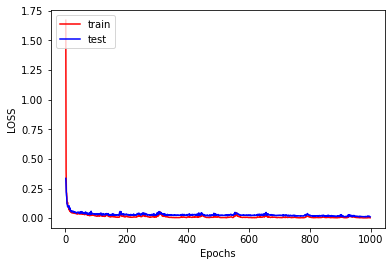

In [22]:
# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

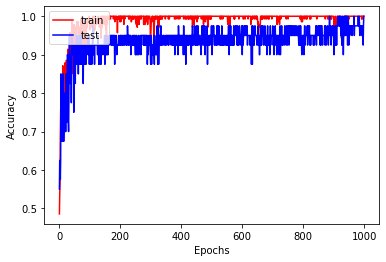

In [23]:
# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# VALIDATE IT 

In [24]:
#predict
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

In [25]:
# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

In [26]:
# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df

,target,predicted
0,5,5
1,1,1
2,0,0
3,3,3
4,1,1
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [27]:
#VALUE THE MODEL
scores=model.evaluate(input_validation,target_validation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(input_validation).round())

1/1 [==============================] - 0s 15ms/step - loss: 0.0069 - categorical_accuracy: 1.0000

categorical_accuracy: 100.00%
[[ 0.  0.  0. -0. -0.  1.]
 [-0.  1.  0.  0. -0.  0.]
 [ 1.  0. -0.  0.  0.  0.]
 [-0.  0.  0.  1.  0. -0.]
 [-0.  1.  0.  0.  0. -0.]
 [ 0. -0.  0. -0.  0.  1.]
 [ 0.  0.  0. -0. -0.  1.]
 [ 0. -0.  0. -0.  1.  0.]
 [ 1.  0. -0.  0.  0.  0.]
 [ 0. -0.  0. -0.  1.  0.]
 [-0.  0. -0.  0. -0.  1.]
 [ 0. -0.  1.  0. -0.  0.]
 [ 0. -0.  0.  0.  1.  0.]
 [-0.  0.  1.  0. -0.  0.]
 [-0.  0.  1.  0.  0. -0.]
 [ 1.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  1.]
 [ 0.  0.  1.  0. -0.  0.]
 [-0.  1.  0.  0.  0. -0.]
 [ 0.  0.  0.  0.  0.  1.]]


In [28]:
# SAVE THE MODEL 
#SERIALIZE THE JSON MODEL
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("model.h5")
print("Modelo Guardado!")

Modelo Guardado!


In this section, in order to compile the model in a correct way, the same training parameters were used, referring to the type of optimizer, the loss and its metrics.

In [29]:
# LOAD THE SAVED MODEL AND COMPILE IT
#USE THE MODEL
# cargar json y crear el modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Cargado modelo desde disco.")
# Compilar modelo cargado y listo para usar.
adam = optimizers.Adam(learning_rate=0.01)
loaded_model.compile(loss='mse', optimizer=adam, metrics=[metrics.categorical_accuracy])

Cargado modelo desde disco.


# TEST
In this section of the notebook the use of the previously trained model is performed by testing it with real data, prior to the test the data cleaning must be performed, for example colors with the same name that only varied their upper or lower case were fixed manually, also the one hot enconding was performed and the input data was normalized.

In [30]:
seed(10)
csv_file = 'test_ds.csv'
df = pd.read_csv(csv_file, header=0) 


# Color Enconding
df["Blue"] = 0
df["Blue White"] = 0
df["Orange"] = 0
df["Orange-Red"] = 0
df["Pale yellow orange"] = 0
df["Red"] = 0
df["White"] = 0
df["White-Yellow"] = 0
df["Whitish"] = 0
df["Yellowish"] = 0
df["Yellowish White"] = 0
df["yellow-White"] = 0


df.loc[df["Color"]=="Blue","Blue"]=1
df.loc[df["Color"]=="Blue White","Blue White"]=1
df.loc[df["Color"]=="Orange","Orange"]=1
df.loc[df["Color"]=="Orange-Red","Orange-Red"]=1
df.loc[df["Color"]=="Pale yellow orange","Pale yellow orange"]=1
df.loc[df["Color"]=="Red","Red"]=1
df.loc[df["Color"]=="White","White"]=1
df.loc[df["Color"]=="White-Yellow","White-Yellow"]=1
df.loc[df["Color"]=="Whitish","Whitish"]=1
df.loc[df["Color"]=="Yellowish","Yellowish"]=1
df.loc[df["Color"]=="Yellowish White","Yellowish White"]=1
df.loc[df["Color"]=="yellow-White","yellow-White"]=1


del(df["Color"])


#Spectral class Enconding
df["A"] = 0
df["B"] = 0
df["F"] = 0
df["G"] = 0
df["K"] = 0
df["M"] = 0
df["O"] = 0

df.loc[df["Spectral_Class"]=="A","A"]=1
df.loc[df["Spectral_Class"]=="B","B"]=1
df.loc[df["Spectral_Class"]=="F","F"]=1
df.loc[df["Spectral_Class"]=="G","G"]=1
df.loc[df["Spectral_Class"]=="K","K"]=1
df.loc[df["Spectral_Class"]=="M","M"]=1
df.loc[df["Spectral_Class"]=="O","O"]=1

del(df["Spectral_Class"])



# shuffle dataset
df = df.sample(frac=1)

# get inputs - outputs
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]


x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled) 

predictions_targets = loaded_model.predict(inputs)

predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))



#CONVERT TO DATA FRAME
df_last=pd.DataFrame(predicted)
df_last.index=df_last.index+1

df_last


df_last=df_last.rename({0:'Type'},axis=1)
df_last.index=df_last.index.rename('Id')
df_last.to_csv('sample_submission.csv',index=True)

predicted

array([5, 0, 3, 3, 5, 1, 3, 1, 0, 1, 0, 0, 0, 1, 4, 3, 2, 0, 5, 3, 4, 1,
       4, 5, 4, 1, 0, 5, 0, 5, 0, 2, 4, 1, 3, 2, 4, 4, 2], dtype=int64)

# A BIT OF THEORY FOR GOOD DECISION MAKING 

## OPTIMIZERS

* Adaptive Gradient Algorithm (AdaGrad)
The AdaGrad algorithm introduces a very interesting variation in the concept of training factor: instead of considering a uniform value for all weights, a specific training factor is maintained for each of them. It would be unfeasible to calculate this value specifically so, starting from the initial training factor, AdaGrad scales and adapts it for each dimension with respect to the gradient accumulated in each iteration.

* Adadelta
Adadelta is a variation of AdaGrad in which instead of calculating the scaling of the training factor for each dimension taking into account the accumulated gradient from the beginning of the run, it is restricted to a fixed size window of the last n gradients.

* RMSprop (Root Mean Square Propagation)
RMSProp is a similar algorithm. It also maintains a different training factor for each dimension, but in this case the scaling of the training factor is done by dividing it by the mean exponential decay of the square of the gradients (glup!).

* Adam (Adaptive moment estimation)
The Adam algorithm combines the goodness of AdaGrad and RMSProp. One training factor per parameter is maintained and in addition to calculating RMSProp, each training factor is also affected by the mean of the gradient momentum.

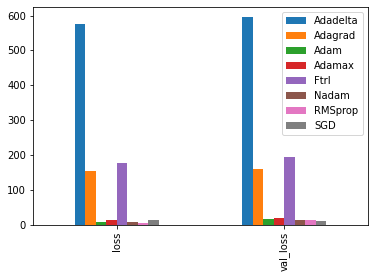

For numerical regression problems according to the following graph obtained from the informative web page of https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5, it can be seen that the adelta optimizer does not converge, Adagrad and Ftrl converge in a suboptimal linear way and the remaining algorithms end up finding a minimum and also present good generalization. It is important to note that the behavior of SGD is quite irregular with multiple "comings and goings" in the convergence process. In absolute terms, RMSProp has the best performance.


As we have just seen, the most recent algorithms, such as Adam, are built on the basis of their predecessors, so we can expect their performance to be superior, which is why in the following experiments we will first test this optimizer by varying the activation function compared to others in order to visualize its performance.


## LOSS FUNCTIONS
As part of the optimization algorithm, the error for the current state of the model must be estimated repeatedly. This requires the choice of an error function, conventionally called a loss function, which can be used to estimate the loss of the model so that the weights can be updated to reduce the loss in the next evaluation.

* Mean square error loss
The mean squared error loss, or MSE, is the default loss used for regression problems.
Mathematically, it is the preferred loss function under the maximum likelihood inference framework if the distribution of the target variable is Gaussian. It is the loss function that should be evaluated first and should only be changed if it has a good reason.
The mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The square means that larger errors result in more errors than smaller errors, which means that the model is punished for making larger errors.

* Logarithmic mean square error loss.
There may be regression problems where the target value has a distribution of values and, when predicting a large value, you may not want to punish a model as severely as the mean square error.
Instead, you can first calculate the natural logarithm of each of the predicted values and then calculate the mean square error. This is called mean square log error loss, or MSLE for short.
It has the effect of relaxing the punishing effect of large differences in the large predicted values.
As a measure of loss, it may be more appropriate when the model directly predicts unscaled quantities. However, we can demonstrate this loss function using our simple regression problem.
The model can be updated to use the loss function ' mean_squared_logarithmic_error ' and keep the same setting for the output layer. We will also keep track of the mean squared error as a metric when fitting the model so that we can use it as a performance measure and plot the learning curve.

* Mean absolute loss of error
In some regression problems, the distribution of the target variable may be primarily Gaussian, but it may have outliers, for example, large or small values far from the mean value.
The loss of mean absolute error, or MAE, is an appropriate loss function in this case, since it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.
The model can be updated to use the loss function 'mean_absolute_error' and keep the same settings for the output layer.







# EXPERIMENTS

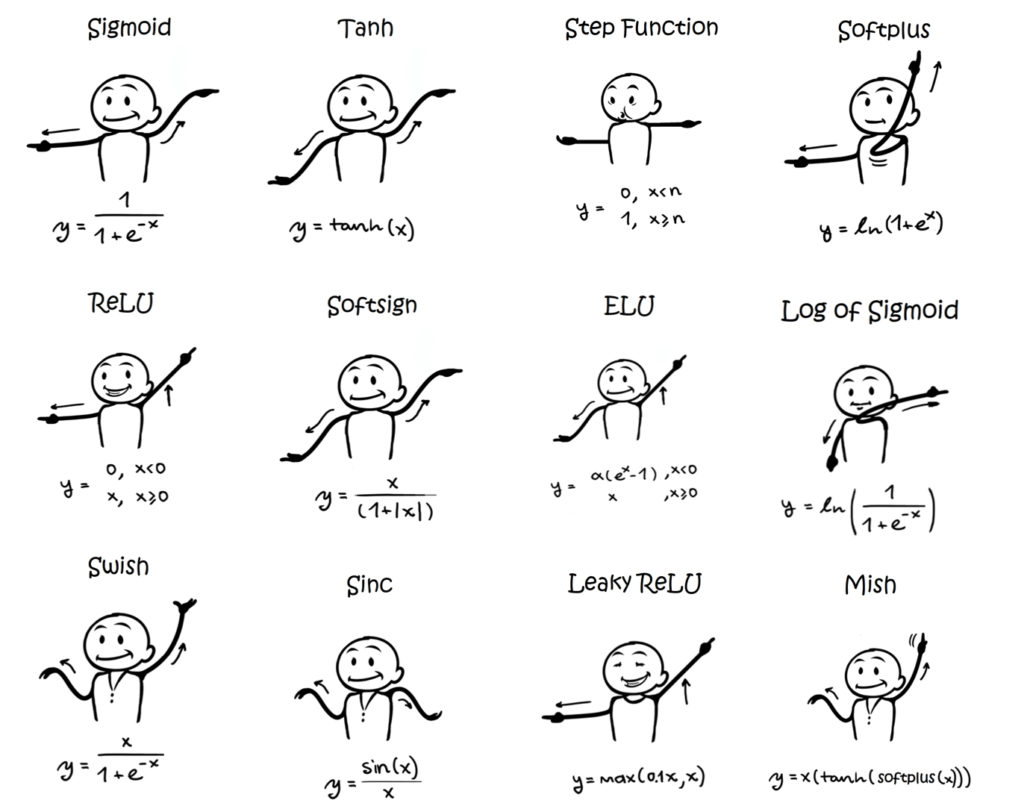

For all experiments, a function was performed that sets all data to zero and at the same time performs the operations that prepare these data for use 

The first experiments are carried out under the same conditions of the model that will be used in the competition, this refers to the number of neurons that will be in each layer

The optimizer and loss were assigned with adam with a learning rate of 0.01 and the loss with mse because it generated better results comparing with other similar ones in the following experiments, as they were tested with optimizers such as RMSprop and others, which made the number of epochs vary a lot, this was the result of each optimizer having by default the parameters already defined which vary a lot, which means that any model running a different optimizer can take much longer to find the best prediction or less which is case dependent. 


The analysis of graphs was performed at the beginning of each experiment, because the other activation models vary greatly in a way that is similar to many others evaluated, it could be said that these are unstable in terms of accuracy but stable in terms of the loss that they have, so that they almost always drop. 


In [31]:
# Color Enconding
def color_enconding(df):
    df["Blue"] = 0
    df["Blue White"] = 0
    df["Orange"] = 0
    df["Orange-Red"] = 0
    df["Pale yellow orange"] = 0
    df["Red"] = 0
    df["White"] = 0
    df["White-Yellow"] = 0
    df["Whitish"] = 0
    df["Yellowish"] = 0
    df["Yellowish White"] = 0
    df["yellow-White"] = 0
    df.loc[df["Color"]=="Blue","Blue"]=1
    df.loc[df["Color"]=="Blue White","Blue White"]=1
    df.loc[df["Color"]=="Orange","Orange"]=1
    df.loc[df["Color"]=="Orange-Red","Orange-Red"]=1
    df.loc[df["Color"]=="Pale yellow orange","Pale yellow orange"]=1
    df.loc[df["Color"]=="Red","Red"]=1
    df.loc[df["Color"]=="White","White"]=1
    df.loc[df["Color"]=="White-Yellow","White-Yellow"]=1
    df.loc[df["Color"]=="Whitish","Whitish"]=1
    df.loc[df["Color"]=="Yellowish","Yellowish"]=1
    df.loc[df["Color"]=="Yellowish White","Yellowish White"]=1
    df.loc[df["Color"]=="yellow-White","yellow-White"]=1
    del(df["Color"])
    return df
    


In [32]:
# Spectral Enconding
def spectral_enconding(df):
    df["A"] = 0
    df["B"] = 0
    df["F"] = 0
    df["G"] = 0
    df["K"] = 0
    df["M"] = 0
    df["O"] = 0
    df.loc[df["Spectral_Class"]=="A","A"]=1
    df.loc[df["Spectral_Class"]=="B","B"]=1
    df.loc[df["Spectral_Class"]=="F","F"]=1
    df.loc[df["Spectral_Class"]=="G","G"]=1
    df.loc[df["Spectral_Class"]=="K","K"]=1
    df.loc[df["Spectral_Class"]=="M","M"]=1
    df.loc[df["Spectral_Class"]=="O","O"]=1
    del(df["Spectral_Class"])
    return df 

## TESTING WITH SIGMOID ACTIVATION FUNCTION



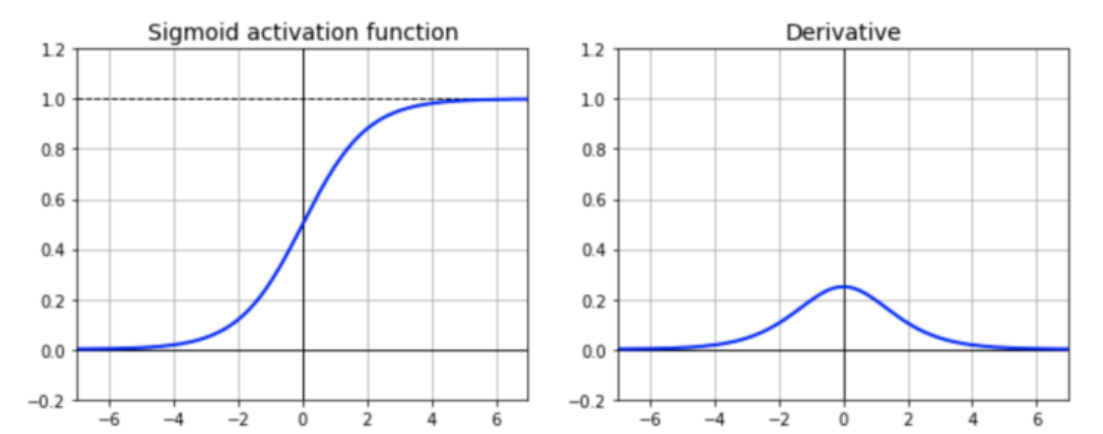

In the following experiment the sigmoid activation function was used and it can be seen that it works correctly because the inputs it receives are neither very large nor very small because if they were theoretically this network would be saturated, due to its mathematical function that would return a derivative extremely close to zero, which would not allow much data for the lower layers, likewise it can be seen that it is computationally more expensive due to the number of epochs required to reach a model that obtains more times the accuracy val of 1. 00, compared to relu activation, this conclusion is taken because both models were run on more than one occasion and the relu model gave more accurate predictions than the sigmoid model.
This situation can most likely happen because the mathematical function of sigmoid becomes exponential. 

It is observed in the loss and epochs graphs that the part of train and test begin with a very varied loss being the train who has more loss at the beginning, but little by little they are falling in the same way, but the test always oscillating, in the part of accuracy there is little difference in the beginning and small variations that make this model not so reliable in the predictions because the train and test rise in the same way but generally collide and do not join if they are not oscillating so that it is not reliable.





Epoch 1/74
3/3 [==============================] - 0s 55ms/step - loss: 0.2145 - categorical_accuracy: 0.1571 - val_loss: 0.1446 - val_categorical_accuracy: 0.0750
Epoch 2/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1463 - categorical_accuracy: 0.1786 - val_loss: 0.1584 - val_categorical_accuracy: 0.0750
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1548 - categorical_accuracy: 0.1786 - val_loss: 0.1622 - val_categorical_accuracy: 0.0750
Epoch 4/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1559 - categorical_accuracy: 0.1786 - val_loss: 0.1597 - val_categorical_accuracy: 0.0750
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1557 - categorical_accuracy: 0.1786 - val_loss: 0.1590 - val_categorical_accuracy: 0.0750
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1547 - categorical_accuracy: 0.1786 - val_loss: 0.1567 - val_categorical_accuracy: 0.0750
Epoch 7/74
3/3 [========

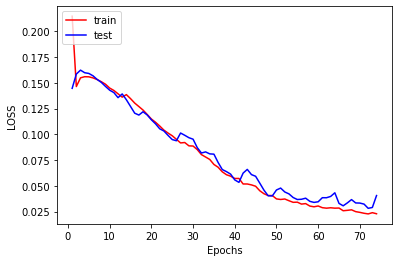

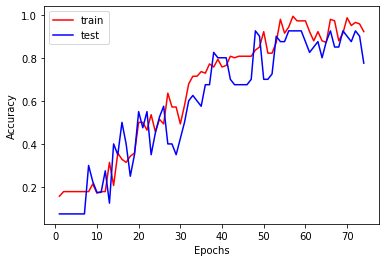

In [33]:
#SIGMOID
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]

## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='sigmoid', input_shape=(23,)))
model.add(layers.Dense(125, activation='sigmoid'))
model.add(layers.Dense(6, activation='sigmoid'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')


plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')


plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})



## TESTING WITH TANH ACTIVATION FUNCTION

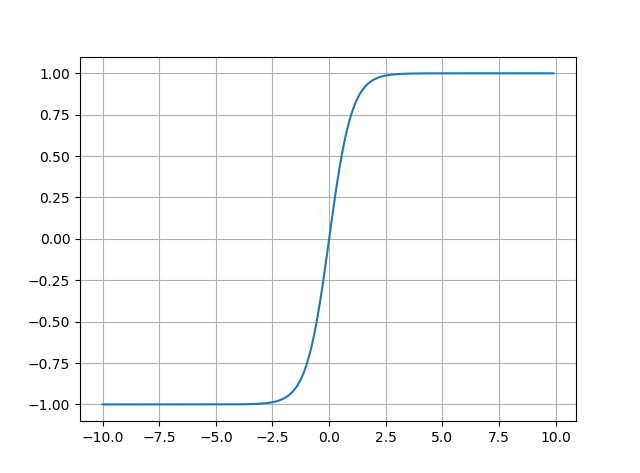

* This function is centered at 0, with a range from -1 to 1.
* Similar to the sigmoid function, this function is differentiable.
* Similar to the sigmoid function, this function is monotonic, but its derivative is not.
Disadvantages:
* Gradient leakage: similar to the sigmoid function. When the inputs become small or large, the function concentrates on 0 or 1, bringing a derivative close to 0. This brings no gradient to propagate through the network, so there is almost nothing left for the lower layers.
* Computationally expensive: having exponential operations.

The value lost graphically even at the beginning of the tangent function is very little and almost equal to that of the train and test but as the epochs are separated so that it seems that the test is going up and the train is going down and in a worse way the accuracy against epochs shows us that they have a very strong oscillation which makes this model not to be used as a model. 


Epoch 1/74
3/3 [==============================] - 0s 62ms/step - loss: 0.1975 - categorical_accuracy: 0.3143 - val_loss: 0.1319 - val_categorical_accuracy: 0.4500
Epoch 2/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1211 - categorical_accuracy: 0.6143 - val_loss: 0.1232 - val_categorical_accuracy: 0.5250
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1022 - categorical_accuracy: 0.7357 - val_loss: 0.1052 - val_categorical_accuracy: 0.5250
Epoch 4/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0815 - categorical_accuracy: 0.7500 - val_loss: 0.0942 - val_categorical_accuracy: 0.5250
Epoch 5/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0737 - categorical_accuracy: 0.7500 - val_loss: 0.0857 - val_categorical_accuracy: 0.6250
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0677 - categorical_accuracy: 0.8000 - val_loss: 0.0693 - val_categorical_accuracy: 0.9250
Epoch 7/74
3/3 [=======

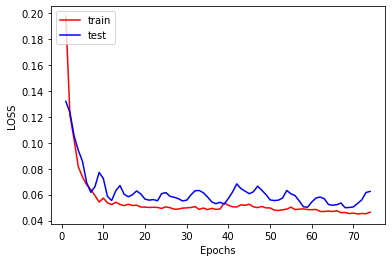

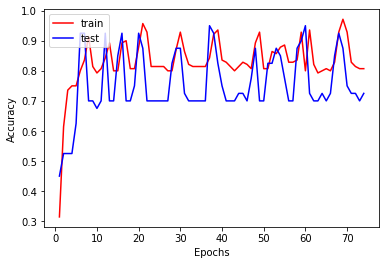

,target,predicted
0,5,5
1,1,0
2,0,0
3,3,4
4,1,0
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [34]:
#TANH
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(23,)))
model.add(layers.Dense(125, activation='tanh'))
model.add(layers.Dense(6, activation='tanh'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})

epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df



## TESTING WITH SOFTMAX ACTIVATION FUNCTION

It is the most generalized form of the sigmoid activation function. It is used in multi-class classification problems. Similar to the sigmoid, the elements of the output vector are in the range 0-1, the difference is that their sum is equal to 1. It is used as the final layer in classification models.

Softmax behaves in a way that converges fast but with a big loss in the prediction which goes down little by little as the epochs pass but this varies greatly in the test because it moves away from the train. 
As for the accuracy it goes up but in a very independent way which makes think that the possible predictions are very varied because they are in the train and test.

Epoch 1/74
3/3 [==============================] - 0s 60ms/step - loss: 0.1390 - categorical_accuracy: 0.1786 - val_loss: 0.1393 - val_categorical_accuracy: 0.0750
Epoch 2/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1388 - categorical_accuracy: 0.1571 - val_loss: 0.1396 - val_categorical_accuracy: 0.1750
Epoch 3/74
3/3 [==============================] - 0s 11ms/step - loss: 0.1388 - categorical_accuracy: 0.1786 - val_loss: 0.1398 - val_categorical_accuracy: 0.1750
Epoch 4/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1388 - categorical_accuracy: 0.1786 - val_loss: 0.1400 - val_categorical_accuracy: 0.1750
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1388 - categorical_accuracy: 0.1786 - val_loss: 0.1401 - val_categorical_accuracy: 0.1750
Epoch 6/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1388 - categorical_accuracy: 0.1786 - val_loss: 0.1404 - val_categorical_accuracy: 0.1750
Epoch 7/74
3/3 [=========

3/3 [==============================] - 0s 10ms/step - loss: 0.1116 - categorical_accuracy: 0.4643 - val_loss: 0.1139 - val_categorical_accuracy: 0.3500
Epoch 52/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1091 - categorical_accuracy: 0.4714 - val_loss: 0.1121 - val_categorical_accuracy: 0.3500
Epoch 53/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1067 - categorical_accuracy: 0.5071 - val_loss: 0.1106 - val_categorical_accuracy: 0.3500
Epoch 54/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1042 - categorical_accuracy: 0.5071 - val_loss: 0.1091 - val_categorical_accuracy: 0.3500
Epoch 55/74
3/3 [==============================] - 0s 11ms/step - loss: 0.1018 - categorical_accuracy: 0.5000 - val_loss: 0.1077 - val_categorical_accuracy: 0.4250
Epoch 56/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0995 - categorical_accuracy: 0.5643 - val_loss: 0.1063 - val_categorical_accuracy: 0.4250
Epoch 57/74
3/3 [============

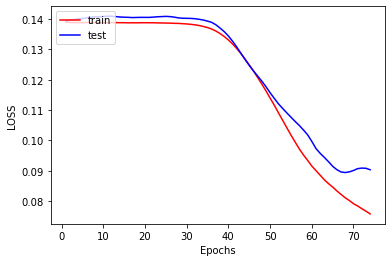

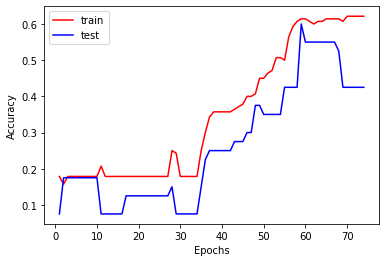

,target,predicted
0,5,5
1,1,0
2,0,0
3,3,4
4,1,0
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [35]:
#SOFTMAX
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='softmax', input_shape=(23,)))
model.add(layers.Dense(125, activation='softmax'))
model.add(layers.Dense(6, activation='softmax'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df



## TESTING WITH SOFTPLUS ACTIVATION FUNCTION
A closer look at the softplus model shows that the loss value is a little higher but it varies from the train and test, since both start differently and end differently, the test and train at one point maintain the same loss. 
As for the accuracy, it never rises more than 0.35 and the train and test are separated from the beginning by the overheating. 

Epoch 1/74
3/3 [==============================] - 0s 53ms/step - loss: 0.3652 - categorical_accuracy: 0.1929 - val_loss: 0.1579 - val_categorical_accuracy: 0.2750
Epoch 2/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1614 - categorical_accuracy: 0.1500 - val_loss: 0.1525 - val_categorical_accuracy: 0.2750
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1623 - categorical_accuracy: 0.1500 - val_loss: 0.1577 - val_categorical_accuracy: 0.2750
Epoch 4/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1625 - categorical_accuracy: 0.1500 - val_loss: 0.1554 - val_categorical_accuracy: 0.2750
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1620 - categorical_accuracy: 0.1500 - val_loss: 0.1494 - val_categorical_accuracy: 0.2750
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1597 - categorical_accuracy: 0.1500 - val_loss: 0.1452 - val_categorical_accuracy: 0.2750
Epoch 7/74
3/3 [======

3/3 [==============================] - 0s 9ms/step - loss: 0.1665 - categorical_accuracy: 0.3214 - val_loss: 0.1662 - val_categorical_accuracy: 0.4000
Epoch 52/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1665 - categorical_accuracy: 0.3214 - val_loss: 0.1661 - val_categorical_accuracy: 0.4000
Epoch 53/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1664 - categorical_accuracy: 0.3214 - val_loss: 0.1660 - val_categorical_accuracy: 0.4000
Epoch 54/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1664 - categorical_accuracy: 0.3143 - val_loss: 0.1656 - val_categorical_accuracy: 0.4000
Epoch 55/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1662 - categorical_accuracy: 0.3071 - val_loss: 0.1651 - val_categorical_accuracy: 0.3750
Epoch 56/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1660 - categorical_accuracy: 0.2429 - val_loss: 0.1639 - val_categorical_accuracy: 0.3000
Epoch 57/74
3/3 [============

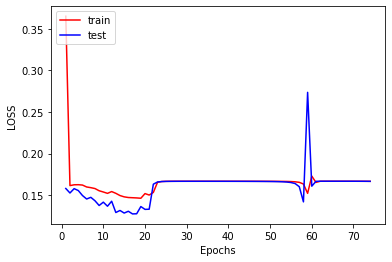

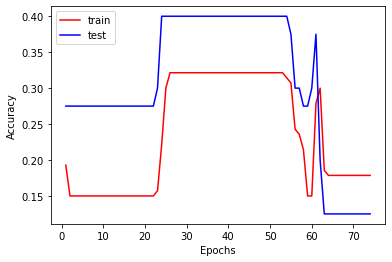

,target,predicted
0,5,4
1,1,4
2,0,4
3,3,4
4,1,4
5,5,4
6,5,4
7,4,4
8,0,4
9,4,4


In [36]:
#SOFTPLUS
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='softplus', input_shape=(23,)))
model.add(layers.Dense(125, activation='softplus'))
model.add(layers.Dense(6, activation='softplus'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df


## TESTING WITH SELU ACTIVATION FUNCTION 
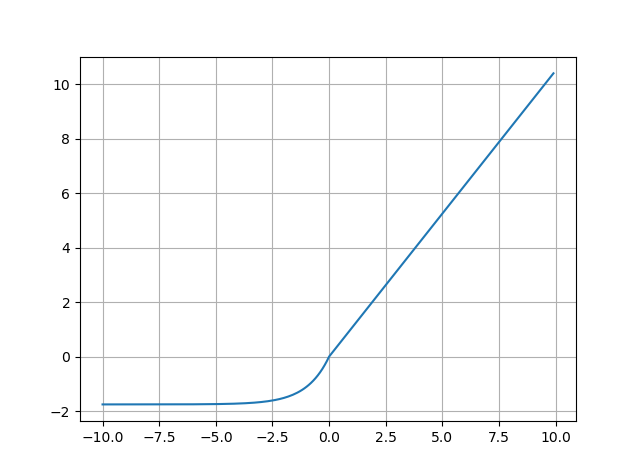

This is another variation of ReLU. The authors showed that if we build a neural network composed exclusively of layers with SELU activation function, the network will self-normalize (the output of each layer will tend to retain mean 0 and standard deviation 1 during training) solving the gradient leakage and bursting problem. In general, this activation function outperforms other activation functions.

SELU works only for neural networks composed of dense layers. It may not work for convolutional neural networks for this reason this activation function was given higher density.


The selu model behaves in a more stable way than the other models seen because test and train do not vary greatly at the beginning of the loss and gradually come together, likewise in the part of the accuracy as time passes the train and test are coming together enabling a closer accuracy to reality in the predictions.


Epoch 1/74
3/3 [==============================] - 0s 54ms/step - loss: 1.2782 - categorical_accuracy: 0.2500 - val_loss: 0.5823 - val_categorical_accuracy: 0.6750
Epoch 2/74
3/3 [==============================] - 0s 10ms/step - loss: 0.5866 - categorical_accuracy: 0.6929 - val_loss: 0.2663 - val_categorical_accuracy: 0.6250
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.2918 - categorical_accuracy: 0.4643 - val_loss: 0.1314 - val_categorical_accuracy: 0.8000
Epoch 4/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1675 - categorical_accuracy: 0.6286 - val_loss: 0.1643 - val_categorical_accuracy: 0.7250
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1365 - categorical_accuracy: 0.7714 - val_loss: 0.1507 - val_categorical_accuracy: 0.7250
Epoch 6/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1475 - categorical_accuracy: 0.6571 - val_loss: 0.1003 - val_categorical_accuracy: 0.8250
Epoch 7/74
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.0368 - categorical_accuracy: 0.9286 - val_loss: 0.0371 - val_categorical_accuracy: 0.9250
Epoch 52/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0324 - categorical_accuracy: 0.8786 - val_loss: 0.0377 - val_categorical_accuracy: 0.8750
Epoch 53/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0353 - categorical_accuracy: 0.8786 - val_loss: 0.0457 - val_categorical_accuracy: 0.8500
Epoch 54/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0316 - categorical_accuracy: 0.9214 - val_loss: 0.0378 - val_categorical_accuracy: 0.9250
Epoch 55/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0332 - categorical_accuracy: 0.9357 - val_loss: 0.0423 - val_categorical_accuracy: 0.8750
Epoch 56/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0326 - categorical_accuracy: 0.9286 - val_loss: 0.0448 - val_categorical_accuracy: 0.8500
Epoch 57/74
3/3 [============

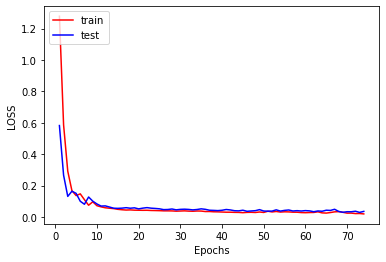

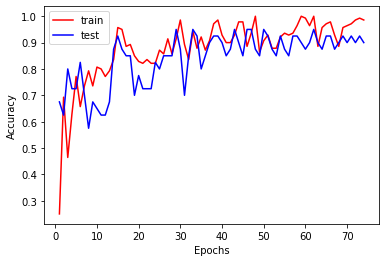

,target,predicted
0,5,5
1,1,1
2,0,0
3,3,3
4,1,1
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [37]:
#SELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(128, activation='selu', input_shape=(23,)))
model.add(layers.Dense(228, activation='selu'))
model.add(layers.Dense(6, activation='selu'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})




epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df


## TESTING WITH ELU ACTIVATION FUNCTION

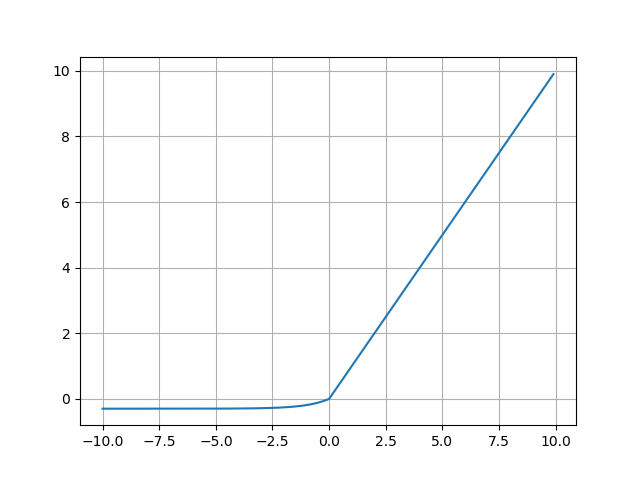

This activation function is a variant of ReLU that modifies the slope of the negative part of the function. Unlike Leaky ReLU and PReLU, instead of a straight line, ELU uses a logarithmic curve to define the negative values. It is defined as follows:

* ELU modifies the gradient of the negative part of the function.
* Unlike Leaky ReLU and PReLU, instead of straight line, ELU uses a logarithmic curve for negative values.
* According to its authors, ELU outperforms all ReLU variants in their experiments.

Disadvantages:

* It is slower to compute than ReLU and its variants.



Epoch 1/74
3/3 [==============================] - 0s 55ms/step - loss: 0.2013 - categorical_accuracy: 0.3214 - val_loss: 0.1309 - val_categorical_accuracy: 0.4750
Epoch 2/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1101 - categorical_accuracy: 0.6000 - val_loss: 0.1006 - val_categorical_accuracy: 0.7250
Epoch 3/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1012 - categorical_accuracy: 0.7286 - val_loss: 0.0827 - val_categorical_accuracy: 0.7000
Epoch 4/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0746 - categorical_accuracy: 0.8000 - val_loss: 0.0817 - val_categorical_accuracy: 0.7000
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0679 - categorical_accuracy: 0.8000 - val_loss: 0.0597 - val_categorical_accuracy: 0.8000
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0632 - categorical_accuracy: 0.7786 - val_loss: 0.0575 - val_categorical_accuracy: 0.8250
Epoch 7/74
3/3 [=======

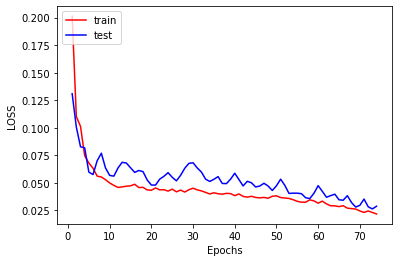

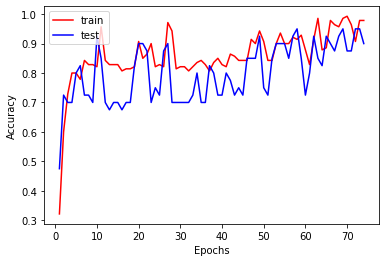

,target,predicted
0,5,5
1,1,1
2,0,0
3,3,4
4,1,1
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [38]:
#TANH
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='ELU', input_shape=(23,)))
model.add(layers.Dense(125, activation='ELU'))
model.add(layers.Dense(6, activation='ELU'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df



## TESTING WITH RELU ACTIVATION FUNCTION


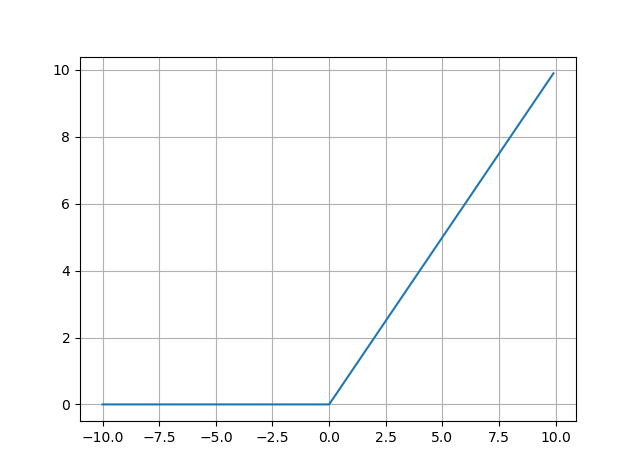

Advantages:

* Sparse activation: for example, in a randomly initialized network, about 50% of the hidden units are activated (have non-zero output).
* Better gradient propagation: less gradient leakage problems compared to sigmoid and thanh activation functions.
* Efficient computation: since it is only comparison, addition and multiplication.
* Scale invariant: max(0,a*x)=a*max(0,x)\text{ for }a*geq0
* It is a faster function to compute (unlike with sigmoid and tanh).


Disadvantages:

* It is not centered at zero.
* It is differentiable at any value, but not at 0, the value of the derivative at this number can be arbitrarily chosen to be 0 or 1.
* Dying ReLU: During training, some neurons effectively die, meaning that they stop producing anything other than 0. In some cases, you may find that half of the neurons in your network are dead, especially if you used a high learning rate. A neuron dies when its weights change such that the weighted sum of its inputs is negative for all instances of the training set. When this happens, it continues to generate zeros and the gradient descent no longer affects it, since the gradient of the ReLU function is 0 when its input is negative.
* Explosion of activations: since it has no upper bound, it is infinite. This sometimes leads to unusable nodes.




Epoch 1/74
3/3 [==============================] - 0s 59ms/step - loss: 0.1447 - categorical_accuracy: 0.3143 - val_loss: 0.1319 - val_categorical_accuracy: 0.3500
Epoch 2/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1083 - categorical_accuracy: 0.4571 - val_loss: 0.1074 - val_categorical_accuracy: 0.5000
Epoch 3/74
3/3 [==============================] - 0s 11ms/step - loss: 0.0939 - categorical_accuracy: 0.6000 - val_loss: 0.0912 - val_categorical_accuracy: 0.5750
Epoch 4/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0822 - categorical_accuracy: 0.5500 - val_loss: 0.0815 - val_categorical_accuracy: 0.7000
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0768 - categorical_accuracy: 0.8214 - val_loss: 0.0828 - val_categorical_accuracy: 0.5750
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0714 - categorical_accuracy: 0.7214 - val_loss: 0.0753 - val_categorical_accuracy: 0.6750
Epoch 7/74
3/3 [=======

Epoch 51/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0552 - categorical_accuracy: 0.8500 - val_loss: 0.0659 - val_categorical_accuracy: 0.7250
Epoch 52/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0552 - categorical_accuracy: 0.8500 - val_loss: 0.0656 - val_categorical_accuracy: 0.7250
Epoch 53/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0550 - categorical_accuracy: 0.8500 - val_loss: 0.0657 - val_categorical_accuracy: 0.7250
Epoch 54/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0550 - categorical_accuracy: 0.8500 - val_loss: 0.0658 - val_categorical_accuracy: 0.7250
Epoch 55/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0550 - categorical_accuracy: 0.8500 - val_loss: 0.0658 - val_categorical_accuracy: 0.7250
Epoch 56/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0550 - categorical_accuracy: 0.8500 - val_loss: 0.0660 - val_categorical_accuracy: 0.7250
Epoch 57/74
3/3 [===

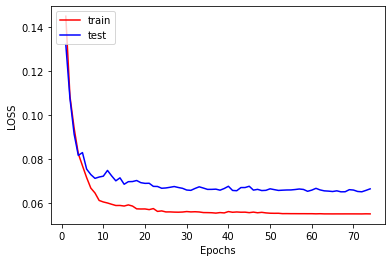

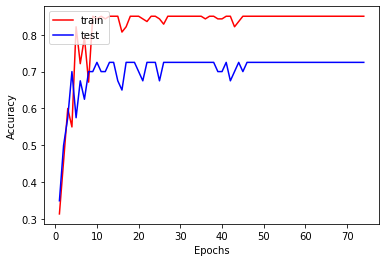

,target,predicted
0,5,5
1,1,0
2,0,0
3,3,3
4,1,0
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [39]:
#RELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(23,)))
model.add(layers.Dense(125, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df



## TESTING WITH PRELU ACTIVATION FUNCTION

It is a variation of Leaky ReLU, where \alpha instead of being a hyperparameter must be learned during training. It has been empirically shown that on large data sets PReLU far outperforms ReLU, but on smaller data sets there is a risk of overfitting the training set.

Epoch 1/74
3/3 [==============================] - 0s 61ms/step - loss: 0.1474 - categorical_accuracy: 0.3214 - val_loss: 0.1305 - val_categorical_accuracy: 0.3250
Epoch 2/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1185 - categorical_accuracy: 0.4571 - val_loss: 0.1203 - val_categorical_accuracy: 0.5250
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1028 - categorical_accuracy: 0.6000 - val_loss: 0.0985 - val_categorical_accuracy: 0.5500
Epoch 4/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0798 - categorical_accuracy: 0.6571 - val_loss: 0.0705 - val_categorical_accuracy: 0.7000
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0632 - categorical_accuracy: 0.7571 - val_loss: 0.0676 - val_categorical_accuracy: 0.6750
Epoch 6/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0575 - categorical_accuracy: 0.8214 - val_loss: 0.0640 - val_categorical_accuracy: 0.8250
Epoch 7/74
3/3 [========

3/3 [==============================] - 0s 10ms/step - loss: 0.0075 - categorical_accuracy: 0.9786 - val_loss: 0.0192 - val_categorical_accuracy: 0.9250
Epoch 52/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0074 - categorical_accuracy: 0.9786 - val_loss: 0.0208 - val_categorical_accuracy: 0.9000
Epoch 53/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0104 - categorical_accuracy: 0.9643 - val_loss: 0.0166 - val_categorical_accuracy: 0.9250
Epoch 54/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0079 - categorical_accuracy: 0.9786 - val_loss: 0.0193 - val_categorical_accuracy: 0.9250
Epoch 55/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0112 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.8750
Epoch 56/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0069 - categorical_accuracy: 0.9786 - val_loss: 0.0173 - val_categorical_accuracy: 0.9250
Epoch 57/74
3/3 [=============

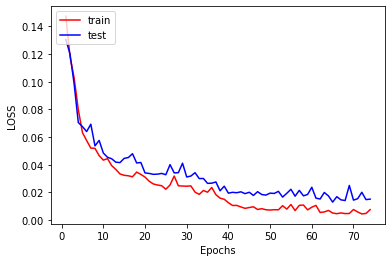

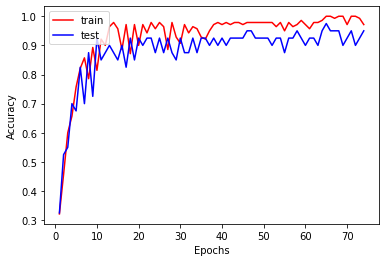

,target,predicted
0,5,5
1,1,1
2,0,0
3,3,3
4,1,1
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [40]:
#PRELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='PReLU', input_shape=(23,)))
model.add(layers.Dense(125, activation='PReLU'))
model.add(layers.Dense(6, activation='PReLU'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})

epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df



## TESTING WITH LeakyReLU ACTIVATION FUNCTION

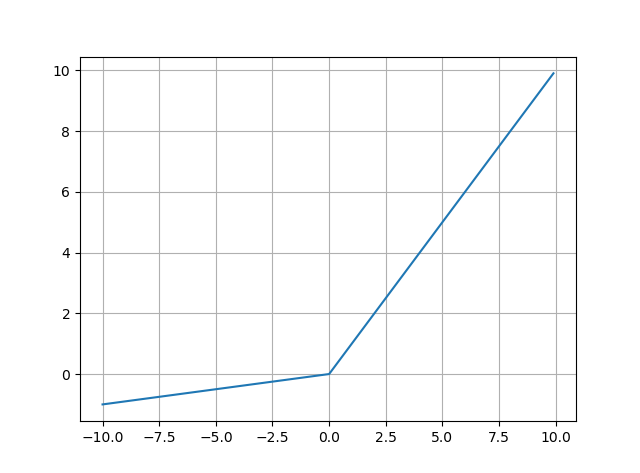


Leaky ReLU es una mejora con respecto a la función de activación ReLU. Tiene todas las propiedades de ReLU, además, nunca tendrá el problema de ReLU moribundo.

Epoch 1/74
3/3 [==============================] - 0s 56ms/step - loss: 0.1416 - categorical_accuracy: 0.3643 - val_loss: 0.0924 - val_categorical_accuracy: 0.6750
Epoch 2/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1071 - categorical_accuracy: 0.6286 - val_loss: 0.0761 - val_categorical_accuracy: 0.7750
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0821 - categorical_accuracy: 0.7714 - val_loss: 0.0767 - val_categorical_accuracy: 0.6250
Epoch 4/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0660 - categorical_accuracy: 0.7714 - val_loss: 0.0650 - val_categorical_accuracy: 0.6500
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0540 - categorical_accuracy: 0.8000 - val_loss: 0.0510 - val_categorical_accuracy: 0.9000
Epoch 6/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0518 - categorical_accuracy: 0.7786 - val_loss: 0.0451 - val_categorical_accuracy: 0.8250
Epoch 7/74
3/3 [========

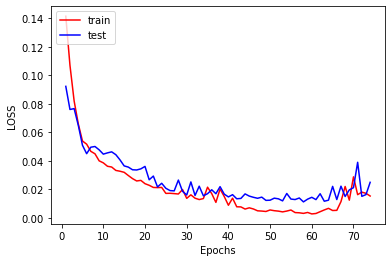

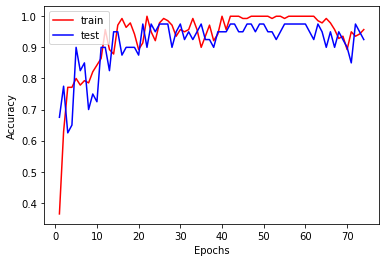

,target,predicted
0,5,5
1,1,1
2,0,0
3,3,3
4,1,1
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4


In [41]:
#PRELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='LeakyReLU', input_shape=(23,)))
model.add(layers.Dense(125, activation='LeakyReLU'))
model.add(layers.Dense(6, activation='LeakyReLU'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']




# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df



# COMPARISON TABLES OF PREDICTIONS USING DIFFERENT ACTIVATION FUNCTIONS 

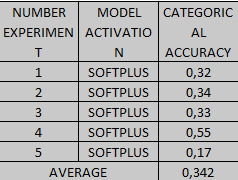
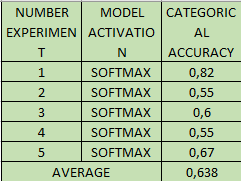
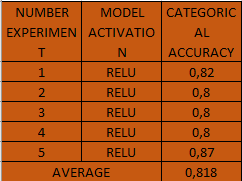
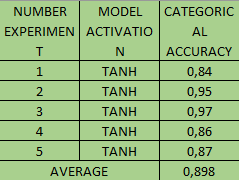
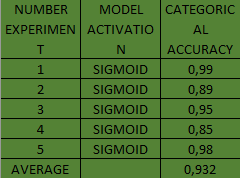
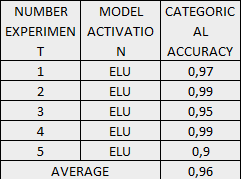
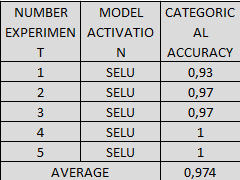
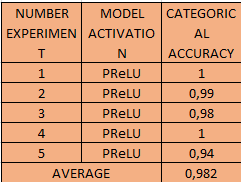
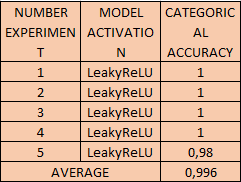


The following tables show an average value resulting from running the prediction of a neural network with specific activation functions, using the Adam optimizer where only the selu function varies the number of layers numerically because it handles a large number of layers, so they all handle the same data:
* num_epocs
* batch_size
* learning rate
* optimizer = Adam 
* loss = mse
They are ordered incrementally so that the last table is the one taken as the final neural network model for the competition, each experiment was performed 5 times on the same neural network model varying its activation function, taking into account its restart in order not to affect the data.

Of all the activation functions applied, the one that gives the best result practically with the static epochs of 74 is the leakyrelu function due to its accuracy in predicting the data and the few epochs it needs to reach.
While the most graphically and practically stable model is that of selu.

This may be because this function solves in general the problem that relu has when its gradient becomes zero, in general the gradient of the negative input will not die compared to ReLU.

# TESTS OF OPTIMIZERS 

## TEST USING LEAKYRELU ACTIVATION FUNCTION AND Adaptive Gradient Algorithm (AdaGrad) OPTIMIZER 


In [42]:
#PRELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='LeakyReLU', input_shape=(23,)))
model.add(layers.Dense(125, activation='LeakyReLU'))
model.add(layers.Dense(6, activation='LeakyReLU'))
rmsprop = optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


Epoch 1/74
3/3 [==============================] - 0s 58ms/step - loss: 0.1596 - categorical_accuracy: 0.2500 - val_loss: 0.1666 - val_categorical_accuracy: 0.0750
Epoch 2/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1576 - categorical_accuracy: 0.2286 - val_loss: 0.1646 - val_categorical_accuracy: 0.0750
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1554 - categorical_accuracy: 0.2071 - val_loss: 0.1626 - val_categorical_accuracy: 0.0750
Epoch 4/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1536 - categorical_accuracy: 0.2143 - val_loss: 0.1608 - val_categorical_accuracy: 0.0750
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1519 - categorical_accuracy: 0.2143 - val_loss: 0.1590 - val_categorical_accuracy: 0.1250
Epoch 6/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1502 - categorical_accuracy: 0.2571 - val_loss: 0.1577 - val_categorical_accuracy: 0.1750
Epoch 7/74
3/3 [=======

## TEST USING LEAKYRELU ACTIVATION FUNCTION AND Adadelta OPTIMIZER 

In [43]:
#PRELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='LeakyReLU', input_shape=(23,)))
model.add(layers.Dense(125, activation='LeakyReLU'))
model.add(layers.Dense(6, activation='LeakyReLU'))
rmsprop = optimizers.Adadelta(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


Epoch 1/74
3/3 [==============================] - 0s 55ms/step - loss: 0.1653 - categorical_accuracy: 0.1786 - val_loss: 0.1608 - val_categorical_accuracy: 0.2750
Epoch 2/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1651 - categorical_accuracy: 0.1786 - val_loss: 0.1605 - val_categorical_accuracy: 0.2750
Epoch 3/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1649 - categorical_accuracy: 0.1786 - val_loss: 0.1603 - val_categorical_accuracy: 0.2750
Epoch 4/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1647 - categorical_accuracy: 0.1786 - val_loss: 0.1601 - val_categorical_accuracy: 0.2750
Epoch 5/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1645 - categorical_accuracy: 0.1786 - val_loss: 0.1598 - val_categorical_accuracy: 0.2750
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.1642 - categorical_accuracy: 0.1857 - val_loss: 0.1597 - val_categorical_accuracy: 0.2750
Epoch 7/74
3/3 [==========

## TEST USING LEAKYRELU ACTIVATION FUNCTION AND RMSprop OPTIMIZER 


In [44]:
#PRELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='LeakyReLU', input_shape=(23,)))
model.add(layers.Dense(125, activation='LeakyReLU'))
model.add(layers.Dense(6, activation='LeakyReLU'))
rmsprop = optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


Epoch 1/74
3/3 [==============================] - 0s 55ms/step - loss: 0.2113 - categorical_accuracy: 0.3214 - val_loss: 0.1095 - val_categorical_accuracy: 0.6250
Epoch 2/74
3/3 [==============================] - 0s 9ms/step - loss: 0.1286 - categorical_accuracy: 0.5786 - val_loss: 0.0869 - val_categorical_accuracy: 0.6000
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0785 - categorical_accuracy: 0.6286 - val_loss: 0.0859 - val_categorical_accuracy: 0.5500
Epoch 4/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0581 - categorical_accuracy: 0.7714 - val_loss: 0.0568 - val_categorical_accuracy: 0.8500
Epoch 5/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0715 - categorical_accuracy: 0.6929 - val_loss: 0.0809 - val_categorical_accuracy: 0.7500
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0618 - categorical_accuracy: 0.7500 - val_loss: 0.0483 - val_categorical_accuracy: 0.8250
Epoch 7/74
3/3 [========

Epoch 51/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0291 - categorical_accuracy: 0.8643 - val_loss: 0.0193 - val_categorical_accuracy: 0.9500
Epoch 52/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0148 - categorical_accuracy: 0.9643 - val_loss: 0.0179 - val_categorical_accuracy: 0.9500
Epoch 53/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0147 - categorical_accuracy: 0.9857 - val_loss: 0.0911 - val_categorical_accuracy: 0.7000
Epoch 54/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0427 - categorical_accuracy: 0.9429 - val_loss: 0.0263 - val_categorical_accuracy: 0.9500
Epoch 55/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0190 - categorical_accuracy: 0.9786 - val_loss: 0.0367 - val_categorical_accuracy: 0.8750
Epoch 56/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0432 - categorical_accuracy: 0.8857 - val_loss: 0.0303 - val_categorical_accuracy: 0.9000
Epoch 57/74
3/3 [====

## TEST USING LEAKYRELU ACTIVATION FUNCTION AND ADAM OPTIMIZER 

In [45]:
#PRELU
seed(10)
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=0) 
new_df=color_enconding(df)
new_df=spectral_enconding(df)
df=new_df    
# SPLIT INPUTS / TARGET FROM DATASET
df = df.sample(frac=1)
inputs = df[['Temperature','L','R','A_M','Blue','Blue White','Orange','Orange-Red','Pale yellow orange','Red','White','White-Yellow','Whitish','Yellowish','Yellowish White','yellow-White','A','B','F','G','K','M','O']]
target = df ['Type']
#Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder()
#Fit label encoder and return encoded labels.
integer_encoded = label_encoder.fit_transform(target)
#Encode categorical features as a one-hot numeric array.
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#Fit OneHotEncoder to X, then transform X.
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)
x = inputs.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs = pd.DataFrame(x_scaled)    
#SPLIT TRAINING SET FROM VALIDATION SET
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)
input_training = inputs[:training_size]
target_training = target[:training_size]
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]
## DEFINE NEURAL NETWORK ARCHITECTURE
model = models.Sequential()
model.add(layers.Dense(64, activation='LeakyReLU', input_shape=(23,)))
model.add(layers.Dense(125, activation='LeakyReLU'))
model.add(layers.Dense(6, activation='LeakyReLU'))
rmsprop = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
## TRAIN IT 
num_epochs = 74
batch_size = 64
history = model.fit(input_training, target_training,
                                validation_data=(input_test, target_test),
                                epochs=num_epochs, batch_size=batch_size, verbose=1)
epochs = range(1, num_epochs+1)
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']
    
    
# VALIDATE IT
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})


Epoch 1/74
3/3 [==============================] - 0s 54ms/step - loss: 0.1402 - categorical_accuracy: 0.2571 - val_loss: 0.0800 - val_categorical_accuracy: 0.6000
Epoch 2/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0829 - categorical_accuracy: 0.6500 - val_loss: 0.0699 - val_categorical_accuracy: 0.6500
Epoch 3/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0758 - categorical_accuracy: 0.7286 - val_loss: 0.0641 - val_categorical_accuracy: 0.9000
Epoch 4/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0628 - categorical_accuracy: 0.8786 - val_loss: 0.0621 - val_categorical_accuracy: 0.6500
Epoch 5/74
3/3 [==============================] - 0s 11ms/step - loss: 0.0508 - categorical_accuracy: 0.7857 - val_loss: 0.0609 - val_categorical_accuracy: 0.7000
Epoch 6/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0479 - categorical_accuracy: 0.8071 - val_loss: 0.0491 - val_categorical_accuracy: 0.7250
Epoch 7/74
3/3 [=======

3/3 [==============================] - 0s 9ms/step - loss: 0.0041 - categorical_accuracy: 0.9929 - val_loss: 0.0160 - val_categorical_accuracy: 0.9750
Epoch 52/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - categorical_accuracy: 1.0000 - val_loss: 0.0139 - val_categorical_accuracy: 0.9500
Epoch 53/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0054 - categorical_accuracy: 0.9929 - val_loss: 0.0197 - val_categorical_accuracy: 0.9250
Epoch 54/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0068 - categorical_accuracy: 0.9857 - val_loss: 0.0181 - val_categorical_accuracy: 0.9250
Epoch 55/74
3/3 [==============================] - 0s 9ms/step - loss: 0.0057 - categorical_accuracy: 1.0000 - val_loss: 0.0171 - val_categorical_accuracy: 0.9500
Epoch 56/74
3/3 [==============================] - 0s 10ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.0151 - val_categorical_accuracy: 0.9750
Epoch 57/74
3/3 [==============

# GENERAL RESULTS OF THE EXECUTION OF OPTIMIZERS
To obtain a good result in the prediction or classification of data not only depends on the activation function, but also on a good optimizer, in this case after choosing the activation function that offered the best result, we wanted to optimize it with a suitable optimizer, we tried all the available optimizers and the one that offered the best result was adam, this gave better results with the leaky relu function.
In the graph you can see that the worst optimizer for this case is adadelta and the best is adam, this is probably due to the adaptive capacity of adam that calculates the learning rate for each parameter, this because it stores the average value of the exponential decrease of the square of the past gradient as adadelta and rmsprop do. 
Theoretically rmsprop has a better overall performance but in practice it is shown that adam is better than other adaptive learning methods.

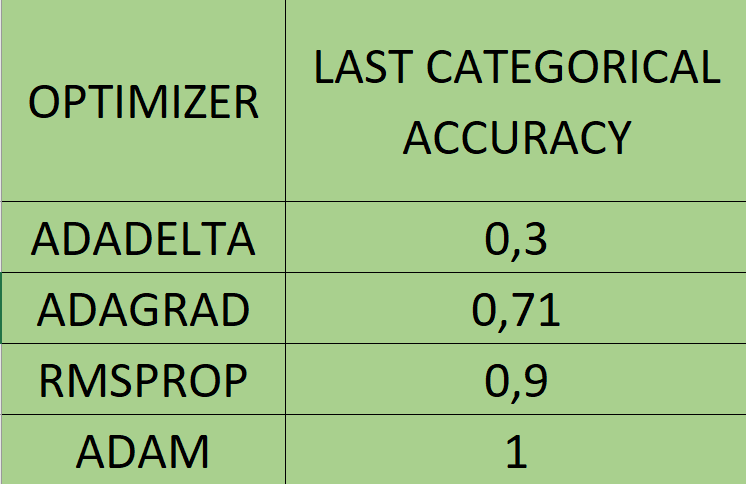

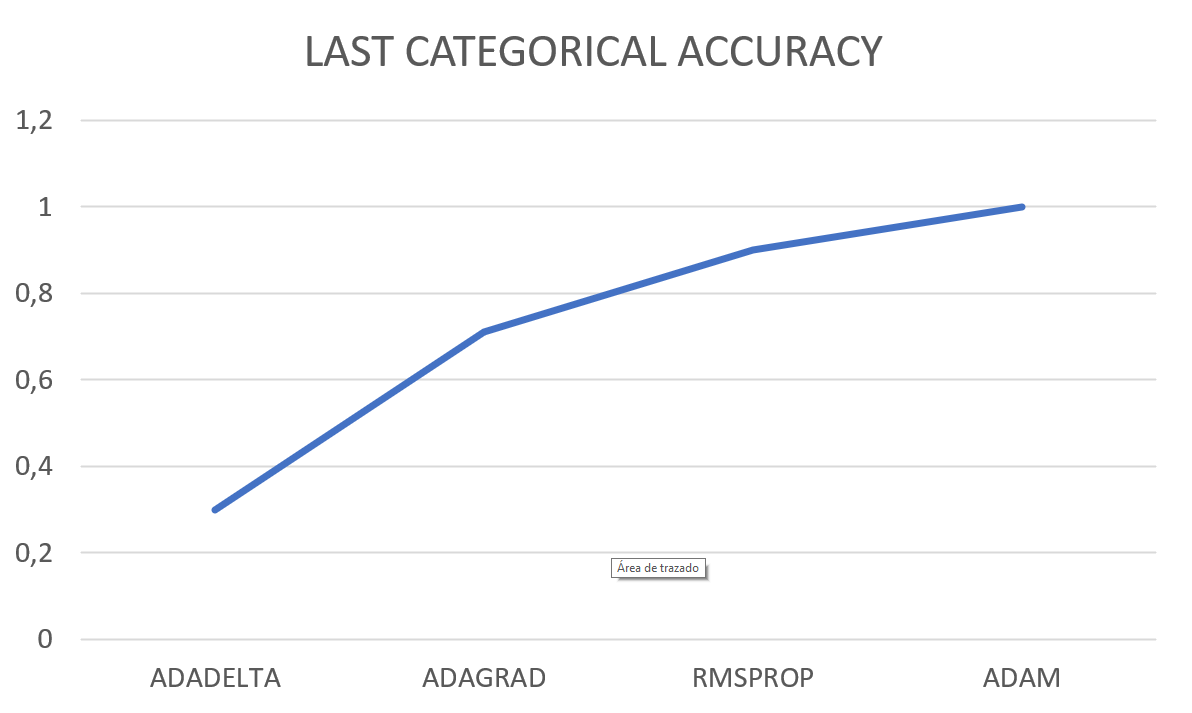

# LOSS FUNCTIONS

Deep learning neural networks are trained using the stochastic gradient descent optimization algorithm.

As part of the optimization algorithm, the error for the current state of the model must be estimated repeatedly. This requires the choice of an error function, conventionally called a loss function, that can be used to estimate the loss of the model so that the weights can be updated to reduce the loss on the next evaluation.

Neural network models learn a mapping from inputs to outputs from examples and the choice of loss function must match the framing of the specific predictive modeling problem, such as classification or regression. Further, the configuration of the output layer must also be appropriate for the chosen loss function.

# LOSS FUNCTION ANALYSIS

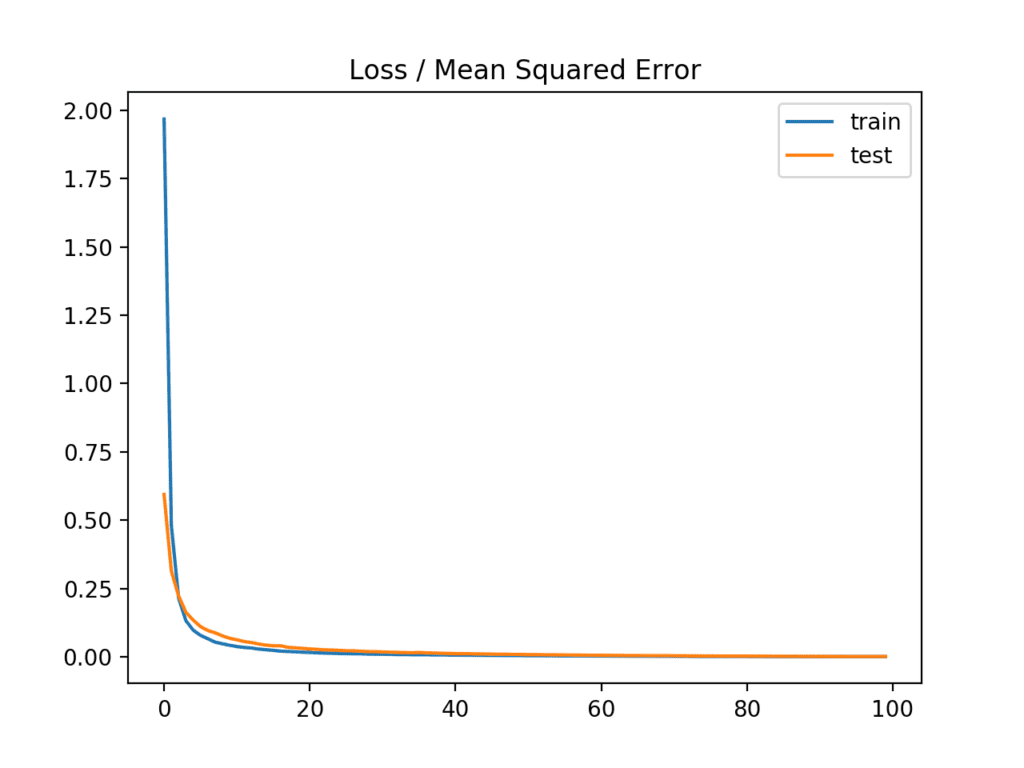

The problem addressed in this practice belongs to a predictive regression model because it must predict a quantity with real value, so it is necessary to find a loss function that is accurate for this type of operation, currently there are 2 loss functions that are usable for this situation because the other functions are mostly for use in binary problems or multiple classes, these same were tested causing problems in the execution, the possible loss functions to use are as follows:

* Mean square error loss
    The mean squared error loss, or MSE, is the default loss used for regression problems.

    Mathematically, it is the preferred loss function under the maximum likelihood inference framework if the distribution of the target variable is Gaussian. It is the loss function that should be evaluated first and should only be changed if it has a good reason.

    The mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. Squared means that larger errors result in more errors than smaller errors, which means that the model is punished for making larger errors.

    The mean squared error loss function can be used in Keras by specifying ' mse ' or ' mean_squared_error ' as the loss function when compiling the model.

* Logarithmic mean square error loss
    There may be regression problems where the target value has a distribution of values and, when predicting a large value, you may not want to punish a model as severely as the mean squared error.

    Instead, you can first calculate the natural logarithm of each of the predicted values and then calculate the mean square error. This is called mean square log error loss, or MSLE for short.

    It has the effect of relaxing the punishing effect of large differences in the large predicted values.

    As a measure of loss, it may be more appropriate when the model directly predicts unscaled quantities. However, we can demonstrate this loss function using our simple regression problem.

    The model can be updated to use the loss function ' mean_squared_logarithmic_error ' and keep the same setting for the output layer. We will also keep track of the mean squared error as a metric when fitting the model so that we can use it as a performance measure and plot the learning curve.

Of these case, it was decided to use the mean square error loss because it offered better results in practice.

# CONCLUSIONS 

To be able to train a neural network in such a way that it results in an almost accurate prediction of reality depends on many factors, among them, first of all, it is necessary to know how to choose an optimization algorithm, among some recommendations that were arrived at after experimenting practically with a theoretical part:

If the data are sparse, use self-applicable methods, namely Adagrad, Adadelta, RMSprop, Adam.

RMSprop, Adadelta, Adam have similar effects in many cases.

Adam added bias and momentum correction on the basis of RMSprop,

As the gradient becomes thinner, Adam will perform better than RMSprop.

In general,Adam is the best choice。

SGD will be used in many papers without momentum.Although SGD can reach the minimum value, it takes longer than other algorithms and can get stuck in the saddle point。

If you need faster convergence, or to train deeper and more complex neural networks, you should use an adaptive algorithm.

Without leaving aside the loss function which is very important for the neural network to run well, which is chosen according to the type of problem you have and to which mathematical function is more similar. 

It can also be concluded that the number of epochs must be a number taken into account in the experimentation because a very high one could make the training and set value vary greatly, making the use of our neuron far from a correct prediction. 

The graphs are of great help to be able to see the learning process of the neural network and at what number of epoch it would be advisable to stop. 

# BIBLIOGRAPHY

* https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5
* https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
* https://torres.ai/deep-learning-inteligencia-artificial-keras/
* https://ichi.pro/es/7-funciones-de-activacion-populares-que-debes-conocer-en-deep-learning-y-como-usarlas-con-keras-y-tensorflow-2-43657675202534


# POROTOS 
Train a model using Random Forest. Describe (investigate) how it works and document it.

# RANDOM FOREST

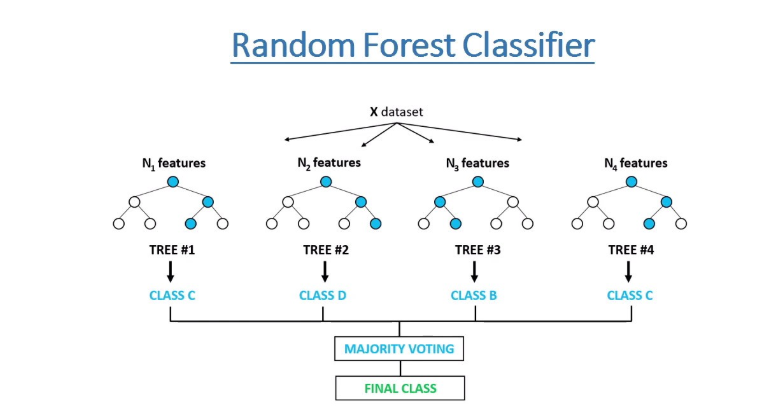

A Random Forest is an ensemble of decision trees combined with bagging. When using bagging, what is actually happening is that different trees see different portions of the data. No single tree sees all of the training data. This results in each tree being trained with different data samples for the same problem. In this way, by combining their results, some errors are compensated by others and we have a prediction that generalizes better.


Several Independent trees are created by varying the cases/observations of the training set and/or the variables used during the training process.

The predictions of each model (tree) have the same weight and the final result is obtained by majority vote.

* Parameters:
    * n_estimators=Number of classifiers, trees in this case.

Suitable values for this and other parameters are obtained via experimentation (trial and error). If possible, it is recommended to have several test sets to select the model with the best (average) performance over all test sets.

Random Forest in scikit-learn: more useful hyper-parameters
scikit-learn offers two implementations of random forests:

For classification: RandomForestClassifier
For regression: RandomForestRegressor
These are the most useful hyper-parameters:

RandomForestRegressor:
* n_estimators: number of trees that the random forest will have. Usually the more the better, but after a certain point it stops improving and just makes it go slower. A good default value may be to use 100 trees.
* n_jobs: number of cores that can be used to train the trees. Each tree is independent of the rest, so training a random forest is a very parallelizable task. By default it uses only 1 CPU core. To improve performance you can use as many cores as you deem necessary. If you use n_jobs = -1, you are indicating that you want to use as many cores as your machine has.
* max_features: uses a way to guarantee that the trees are different, is that they are all trained with a random sample of the data. If we want to make them even more different, we can make different trees use different attributes. This can be useful especially when some attributes are related to each other. There are several strategies for choosing the maximum number of attributes that can be used; see the documentation to learn more.
* Regularization (also available for Decision Trees):
    * max_depth: the maximum depth of the tree. In the examples above we have used max_depth = 2
    * min_samples_split: minimum number of samples needed before splitting this node. It can also be expressed as a percentage.
    * min_samples_leaf: minimum number of samples that must be in a final node (leaf). It can also be expressed as a percentage.
    * max_leaf_nodes: maximum number of end nodes.


In [36]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score, recall_score, f1_score

In [37]:
# read dataset
csv_file = 'assignment_ds_without_normalizing.csv'
df = pd.read_csv(csv_file, header=0)
df[0:10]

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.0773,17.08,Red,M,0
1,12098,689.000000,7.0100,0.02,Blue-white,A,3
2,2731,0.000437,0.0856,18.09,Red,M,0
3,37800,202900.000000,6.8600,-4.56,Blue,O,3
4,8570,0.000810,0.0097,14.20,Blue white,A,2
5,3605,126000.000000,1124.0000,-10.81,Red,M,5
6,8052,8.700000,1.8000,2.42,Whitish,A,3
7,3574,200000.000000,89.0000,-5.24,Red,M,4
8,8829,537493.000000,1423.0000,-10.73,White,A,5
9,3625,74000.000000,876.0000,-10.25,Red,M,5


Getting the count of all the type of colors present in the dataset.

In [38]:
df['Color'].value_counts()

Red                   92
Blue                  47
Blue-white            18
Blue White            10
yellow-white           8
White                  7
Blue white             4
Yellowish White        3
white                  2
Orange                 2
Orange-Red             1
Pale yellow orange     1
White-Yellow           1
Yellowish              1
Blue-White             1
Whitish                1
yellowish              1
Name: Color, dtype: int64

We see there are different types of similar colors. We can group them together to a color to which they are strongly related. This will help to simplify our data. Let's do it.

In [39]:
x=['Blue-white','yellow-white','Blue White', 'Blue white', 'Yellowish White', 'white', 'Whitish', 'Blue-White', 'White-Yellow']
for i in x:
    df.loc[df['Color']==i, 'Color']='White'

In [40]:
x=['yellowish','Yellowish']
for i in x:
    df.loc[df['Color']==i, 'Color']='Yellow'

In [41]:
x=['Pale yellow orange','Orange-Red']
for i in x:
    df.loc[df['Color']==i, 'Color']='Orange'

In [42]:
df['Color'].value_counts()

Red       92
White     55
Blue      47
Orange     4
Yellow     2
Name: Color, dtype: int64

We grouped all the stars to five colors namely, 'Red', 'White', 'Blue', 'Orange', and 'Yellow'.
Now let's encode all the Color column and Spectral class name categorical data to numeric values.

In [43]:
df['Color'] = LabelEncoder().fit_transform(df['Color'])
df['Spectral_Class'] = LabelEncoder().fit_transform(df['Spectral_Class'])
print(df['Color'].unique())
print(df['Spectral_Class'].unique())

[2 3 0 4 1]
[5 0 6 1 4 2 3]


In [44]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.0773,17.08,2,5,0
1,12098,689.000000,7.0100,0.02,3,0,3
2,2731,0.000437,0.0856,18.09,2,5,0
3,37800,202900.000000,6.8600,-4.56,0,6,3
4,8570,0.000810,0.0097,14.20,3,0,2


For training our model, we will be using Random Forest classifier and K Nearest Neighbor Classifier and compare the results.

In [45]:
X=df.drop('Type', axis=1)
Y=df['Type']

In [46]:
print(X.shape, Y.shape)

(200, 6) (200,)


In [47]:
# Using MinMaxScaler to scale the input data.

x_scaled = MinMaxScaler().fit_transform(X)
x_scaled

array([[3.97782507e-02, 6.36905182e-10, 3.53606862e-05, 9.06816760e-01,
        5.00000000e-01, 8.33333333e-01],
       [2.66913639e-01, 8.11141626e-04, 3.59334369e-03, 3.73358349e-01,
        7.50000000e-01, 0.00000000e+00],
       [2.08087018e-02, 4.20286784e-10, 3.96203915e-05, 9.38398999e-01,
        5.00000000e-01, 8.33333333e-01],
       ...,
       [2.91216731e-01, 1.17491926e-03, 3.18276969e-03, 3.29580988e-01,
        7.50000000e-01, 0.00000000e+00],
       [9.73726387e-01, 2.40163876e-01, 5.43579454e-03, 2.25766104e-01,
        0.00000000e+00, 1.00000000e+00],
       [2.64601561e-01, 8.24091733e-10, 4.10574005e-07, 7.52032520e-01,
        7.50000000e-01, 1.66666667e-01]])

We will be splitting the data into 70% train set and 30% test set.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.4, random_state=47)

In [49]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 6) (120,) (80, 6) (80,)


In [50]:
# Creating a function for training the model and calculating metrics. 

def model_training(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    cm = confusion_matrix(y_test, y_hat)
    c_report = classification_report(y_test, y_hat)
    precision = precision_score(y_test, y_hat, average='micro')
    recall = recall_score(y_test, y_hat, average='micro')
    f1 = f1_score(y_test, y_hat, average='micro')
    return accuracy, cm, precision, recall, f1, c_report

In [51]:
# Using RandomForestClassifier.

rfc = RandomForestClassifier(random_state=42, 
                                 n_estimators= 250,
                                 criterion= 'gini', 
                                 max_depth= 5, 
                                 max_features= 'log2',
                                 min_samples_leaf= 4,
                                 min_samples_split= 3,)

accuracy, cm, precision, recall, f1, c_report = model_training(X_train, X_test, y_train, y_test, rfc)

print('Accuracy :', accuracy)
print('--------------------------------------------')
print('Confusion Matrix :\n', cm)
print('--------------------------------------------')
print('Classification Report :\n', c_report)
print('--------------------------------------------')
print('Precision: %.3f ' % precision)
print('Recall: %.3f ' % recall)

print('F1 score: %.3f' % f1)

Accuracy : 1.0
--------------------------------------------
Confusion Matrix :
 [[12  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 17]]
--------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        17

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

--------------------------------------------
Precision: 1.000 
Recall: 1.000 
F1 score: 1.000


In [52]:
#predict
label_encoder = LabelEncoder()
predictions_targets = rfc.predict(X_test)
predictions_targets

array([5, 3, 0, 2, 5, 3, 0, 5, 3, 0, 2, 3, 3, 2, 1, 5, 1, 1, 4, 5, 3, 2,
       4, 2, 2, 3, 1, 1, 0, 4, 0, 4, 2, 3, 4, 1, 5, 1, 1, 1, 2, 1, 5, 5,
       3, 1, 1, 2, 4, 0, 0, 0, 5, 1, 1, 5, 5, 4, 5, 2, 0, 4, 3, 5, 0, 3,
       4, 3, 4, 5, 5, 3, 2, 1, 1, 1, 5, 0, 5, 0], dtype=int64)

In [53]:
# target
targets_val = y_test.values
targets_val

array([5, 3, 0, 2, 5, 3, 0, 5, 3, 0, 2, 3, 3, 2, 1, 5, 1, 1, 4, 5, 3, 2,
       4, 2, 2, 3, 1, 1, 0, 4, 0, 4, 2, 3, 4, 1, 5, 1, 1, 1, 2, 1, 5, 5,
       3, 1, 1, 2, 4, 0, 0, 0, 5, 1, 1, 5, 5, 4, 5, 2, 0, 4, 3, 5, 0, 3,
       4, 3, 4, 5, 5, 3, 2, 1, 1, 1, 5, 0, 5, 0], dtype=int64)

In [54]:
# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predictions_targets})
df

,target,predicted
0,5,5
1,3,3
2,0,0
3,2,2
4,5,5
...,...,...
75,1,1
76,5,5
77,0,0
78,5,5


In [55]:
import joblib

# Save to file in the current working directory
joblib_file = "joblib_model.pkl"
joblib.dump(rfc, joblib_file)

# Load from file
joblib_model = joblib.load(joblib_file)

# Calculate the accuracy and predictions
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))


Test score: 100.00 %


In [56]:
# read dataset
csv_file = 'test_ds.csv'
df = pd.read_csv(csv_file, header=0)


x=['Blue-white','yellow-white','Blue White', 'Blue white', 'Yellowish White', 'white', 'Whitish', 'Blue-White', 'White-Yellow']
for i in x:
    df.loc[df['Color']==i, 'Color']='White'
    
x=['yellowish','Yellowish']
for i in x:
    df.loc[df['Color']==i, 'Color']='Yellow'

x=['Pale yellow orange','Orange-Red']
for i in x:
    df.loc[df['Color']==i, 'Color']='Orange'
    
df['Color'] = LabelEncoder().fit_transform(df['Color'])
df['Spectral_Class'] = LabelEncoder().fit_transform(df['Spectral_Class'])

X=df

x_scaled = MinMaxScaler().fit_transform(X)
inputs = pd.DataFrame(x_scaled) 


predictions_targets = rfc.predict(inputs)
predictions_targets

#CONVERT TO DATA FRAME
df_last=pd.DataFrame(predictions_targets)
df_last.index=df_last.index+1

df_last


df_last=df_last.rename({0:'Type'},axis=1)
df_last.index=df_last.index.rename('Id')
df_last.to_csv('sample_submission.csv',index=True)

df_last

,Type
Id,
1,2
2,0
3,3
4,1
5,1
6,1
7,3
8,5
9,5
